# Importing Packages

In [2]:
import sys
!{sys.executable} -m pip install astropy
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scipy
from scipy import optimize
from astropy.io import fits
from astropy.table import Table
from scipy import interpolate
%matplotlib inline
from matplotlib.patches import Rectangle


np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision = 40, suppress = True) #prevents scientific notation for 40 character numbers

/opt/anaconda3/envs/Git_JupyterLab/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
### Read in data file

GSample = fits.open('/Users/edm/Library/CloudStorage/Dropbox/Data/100pc_rvnotnull-Matched-Best.fits')
GSample_A3 = Table(GSample[1].data)

In [3]:
## print length of table

len(GSample_A3)

167020

In [4]:
## take a look at columns

GSample_A3

SOURCE_ID_1,RA_1,RA_ERROR_1,DEC_1,DEC_ERROR_1,PARALLAX_1,PARALLAX_ERROR_1,PMRA_1,PMRA_ERROR_1,PMDEC_1,PMDEC_ERROR_1,PHOT_G_MEAN_MAG_1,PHOT_G_MEAN_FLUX_OVER_ERROR_1,PHOT_BP_MEAN_MAG_1,PHOT_BP_MEAN_FLUX_OVER_ERROR_1,PHOT_RP_MEAN_MAG_1,PHOT_RP_MEAN_FLUX_OVER_ERROR_1,PHOT_BP_RP_EXCESS_FACTOR_1,RUWE_1,IPD_FRAC_MULTI_PEAK_1,ADOPTEDRV,ADOPTEDRV_ERROR,ADOPTEDRV_REFNAME,RADIAL_VELOCITY_IS_VALID,GCNS_PROB,WD_PROB,DIST_1,DIST_16,DIST_50,DIST_84,XCOORD_50,XCOORD_16,XCOORD_84,YCOORD_50,YCOORD_16,YCOORD_84,ZCOORD_50,ZCOORD_16,ZCOORD_84,UVEL_50,UVEL_16,UVEL_84,VVEL_50,VVEL_16,VVEL_84,WVEL_50,WVEL_16,WVEL_84,NAME_GUNN,REFNAME_GUNN,GMAG_GUNN,E_GMAG_GUNN,RMAG_GUNN,E_RMAG_GUNN,IMAG_GUNN,E_IMAG_GUNN,ZMAG_GUNN,E_ZMAG_GUNN,NAME_2MASS,J_M_2MASS,J_MSIG_2MASS,H_M_2MASS,H_MSIG_2MASS,K_M_2MASS,K_MSIG_2MASS,NAME_WISE,W1MPRO_PM_WISE,W1SIGMPRO_PM_WISE,W2MPRO_PM_WISE,W2SIGMPRO_PM_WISE,W3MPRO_WISE,W3SIGMPRO_WISE,W4MPRO_WISE,W4SIGMPRO_WISE,source_id_2,designation,ra_2,dec_2,l,b,ecl_lon,ecl_lat,parallax_2,pmra_2,pmdec_2,phot_g_mean_mag_2,phot_bp_mean_mag_2,phot_rp_mean_mag_2,radial_velocity,radial_velocity_error,rv_template_teff,teff_gspphot,vbroad
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,str19,str1,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str26,str19,float64,float64,float64,float64,float64,float64,float64,float64,str17,float32,float32,float32,float32,float32,float32,str20,float32,float32,float32,float32,float32,float32,float32,float32,int64,str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
5853498713190525696,217.39232147200883,0.023999203,-62.67607511676666,0.03443618,768.0665391873573,0.049872905,-3781.741008265163,0.031386077,769.4650146478623,0.050524533,8.984749,1527.8928,11.373116,420.41574,7.5685353,618.5337,1.6316793,0.97145325,11,-22.4,0.5,2006A&A...460..695T,F,1.0,0.21443602693602687,0.0012770583946187207,0.0012770583946187207,0.0013019451052972402,0.0013020443168793232,0.9026825912071892,0.8854277926826533,0.9027513779537488,-0.937190962916208,-0.9192765360715417,-0.9372623792898834,-0.0435694361577848,-0.04273660538199148,-0.04357275626143133,-29.5762032213989,-29.9273200783836,-29.2281213997157,1.97715744885935,1.61684347149232,2.34190888620955,13.7846931790232,13.7680476959747,13.8016945416289,142934.69-624034.9,2018PASA...35...10W,11.564000129699707,0.0020000000949949026,10.406999588012695,0.006000000052154064,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,5853498713190525696,Gaia DR3 5853498713190525696,217.39232147200883,-62.67607511676666,313.92549558326704,-1.9177544232946377,239.09130642182723,-44.76774317922497,768.0665391873573,-3781.741008265163,769.4650146478623,8.984749,11.373116,7.5685353,-21.942726,0.21612652,3500.0,2829.3542,nan
4472832130942575872,269.44850252543836,0.026238997,4.739420051112412,0.029043527,546.975939730948,0.040116355,-801.5509783684709,0.031820867,10362.394206546573,0.036070455,8.1939745,1553.9851,9.791788,951.9071,6.9580913,1518.3344,1.4803807,1.0848505,0,nan,nan,NaN,F,1.0,0.1975547138047138,0.0018279756246380554,0.0018281857970720895,0.0018380001506495126,0.0018475229351995032,1.5273049805078276,1.5191496432550171,1.5352180355020635,0.9194912489032898,0.9145814493992505,0.9242551859768606,0.44734762041826476,0.44495892218162303,0.4496653541826982,nan,nan,nan,nan,nan,nan,nan,nan,nan,1237668573088843078,2017ApJS..233...25A,10.22888,0.000203955,11.28868,0.001803346,11.12333,0.002675003,7.153592,0.0002993524,...,nan,nan,nan,nan,nan,nan,J175747.92+044324.5,13.521,0.015,14.485,0.03,nan,nan,nan,nan,4472832130942575872,Gaia DR3 4472832130942575872,269.44850252543836,4.739420051112412,31.049417957939717,14.0866036680238

In [5]:
#added in kinematics for brown dwarf 1227133699053734528 from eileen's paper

df = GSample_A3.to_pandas()
new_row = {'source_id_2':1227133699053734528, 'SOURCE_ID_1':1227133699053734528, 'RA_1':214.10070487061, 'DEC_1':13.80784459098, 'PARALLAX_1':107.7375, 'PARALLAX_ERROR_1':0.2163, 'PMRA_1':86.670, 'PMRA_ERROR_1':0.291, 'PMDEC_1':127.953, 'PMDEC_ERROR_1':0.198, 'PHOT_BP_MEAN_MAG_1':21.552280, 'PHOT_BP_MEAN_FLUX_OVER_ERROR_1':0.204305, 'PHOT_RP_MEAN_MAG_1':16.681887, 'PHOT_RP_MEAN_FLUX_OVER_ERROR_1':0.009775, 'parallax_2':107.7375, 'phot_g_mean_mag_2':18.353840, 'phot_bp_mean_mag_2':21.552280, 'phot_rp_mean_mag_2':16.681887, 'radial_velocity':-42.38, 'radial_velocity_error':0.5399999999999991, 'teff_gspphot':np.nan}
GSample_A2 = df.append(new_row, ignore_index = True)


/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/775844516.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  GSample_A2 = df.append(new_row, ignore_index = True)


In [6]:
GSample_A2

,SOURCE_ID_1,RA_1,RA_ERROR_1,DEC_1,DEC_ERROR_1,PARALLAX_1,PARALLAX_ERROR_1,PMRA_1,PMRA_ERROR_1,PMDEC_1,...,pmra_2,pmdec_2,phot_g_mean_mag_2,phot_bp_mean_mag_2,phot_rp_mean_mag_2,radial_velocity,radial_velocity_error,rv_template_teff,teff_gspphot,vbroad
0,5.853499e+18,217.392321,0.023999,-62.676075,0.034436,768.066539,0.049873,-3781.741008,0.031386,769.465015,...,-3781.741008,769.465015,8.984749,11.373116,7.568535,-21.942726,0.216127,3500.0,2829.354248,NaN
1,4.472832e+18,269.448503,0.026239,4.739420,0.029044,546.975940,0.040116,-801.550978,0.031821,10362.394207,...,-801.550978,10362.394207,8.193974,9.791788,6.958091,-110.468224,0.131255,3300.0,3099.633545,NaN
2,7.628155e+17,165.830960,0.024126,35.948653,0.029373,392.752945,0.032067,-580.057087,0.025566,-4776.588719,...,-580.057087,-4776.588719,6.551172,7.691122,5.475513,-85.110641,0.131003,3900.0,3511.044922,10.002441
3,4.075142e+18,282.458789,0.029065,-23.837097,0.026151,336.026602,0.031666,639.367850,0.036839,-193.957925,...,639.367850,-193.957925,9.126414,10.732183,7.898147,-11.116440,0.565507,3100.0,3117.375977,NaN
4,1.926461e+18,355.480015,0.032182,44.170376,0.021303,316.481187,0.044449,112.527465,0.036434,-1591.649762,...,112.527465,-1591.649762,10.379277,12.546428,9.017014,-77.289825,0.185324,3200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167016,6.832879e+18,318.176814,0.023787,-19.639974,0.017113,10.000128,0.032527,70.639798,0.032993,0.940239,...,70.639798,0.940239,14.719197,16.046291,13.585066,-15.876756,2.726470,3600.0,3551.081787,NaN
167017,7.147548e+16,55.057709,0.041411,28.350757,0.027147,10.000066,0.048958,42.979413,0.043987,-28.578830,...,42.979413,-28.578830,15.506643,16.973078,14.323343,-12.006425,8.943284,3600.0,3442.629395,NaN
167018,4.738814e+17,60.747614,0.010010,60.727335,0.009679,10.000032,0.013737,-44.060846,0.017111,32.695987,...,-44.060846,32.695987,9.267752,9.624231,8.743373,8.298397,0.155001,5500.0,5576.322754,NaN
167019,5.181802e+17,30.155441,0.008065,65.266687,0.009164,10.000029,0.012865,-42.988428,0.010003,42.605428,...,-42.988428,42.605428,13.608475,14.623214,12.597395,-57.091637,1.474421,4000.0,3871.986084,NaN


### gaia source kinematic values

In [7]:
## pull out variables on interest

#radial velocity
Rvel = np.asarray(GSample_A2["radial_velocity"])
rv = Rvel
rv_e = np.asarray(GSample_A2["radial_velocity_error"]) 


# PM RA and Dec
PMD = np.asarray(GSample_A2['PMDEC_1'])
PMR = np.asarray(GSample_A2['PMRA_1'])
PMR_e = np.asarray(GSample_A2['PMRA_ERROR_1'])
PMD_e = np.asarray(GSample_A2['PMDEC_ERROR_1'])

#RA and DEc ICRS
ra = np.asarray(GSample_A2['RA_1'])
dec = np.asarray(GSample_A2['DEC_1'])

#galactic coords
y = np.asarray(GSample_A2['YCOORD_50'])
x = np.asarray(GSample_A2['XCOORD_50'])
z = np.asarray(GSample_A2['ZCOORD_50'])

#parallax
plx = np.asarray(GSample_A2['PARALLAX_1'])
plx_e = np.asarray(GSample_A2['PARALLAX_ERROR_1'])

#median distance

## read in temperature
teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_id = np.asarray(GSample_A2["source_id_2"])

## read in mags
phot_bp_mean_mag = np.asarray(GSample_A2['PHOT_BP_MEAN_MAG_1'])
phot_bp_mean_mag_err = np.asarray(1/GSample_A2['PHOT_BP_MEAN_FLUX_OVER_ERROR_1']) * phot_bp_mean_mag

phot_rp_mean_mag = np.asarray(GSample_A2['PHOT_RP_MEAN_MAG_1'])
phot_rp_mean_mag_err = np.asarray(1/GSample_A2['PHOT_RP_MEAN_FLUX_OVER_ERROR_1']) * phot_rp_mean_mag

## for zero point 
ecl_lat = np.asarray(GSample_A2['ecl_lat'])


In [8]:
1/107.7375 *1000

9.281819236570367

In [9]:
plx[167020] #checks the parallax of 167020 (J1416AB)

107.7375

# Gaia Monte Carlo

### J1416 AB Kinematic Values and Photometric Values

In [10]:
# Variables for Brown Dwarfs (J1416AB)

#radial velocity
#BD_rv=np.asarray(-86.95241909233778)
BD_rv=np.asarray(-42.38)
BD_rv_e=np.asarray(0.5399999999999991)

BD_ras = np.asarray(214.10070487061)
BD_ras_err = np.asarray(0.1901)
BD_decs = np.asarray(13.80784459098)
BD_decs_err = np.asarray(0.1510)
# PM RA and Dec
BD_PMD = np.asarray(127.953)
BD_PMD_err = np.asarray(0.198)
BD_PMR = np.asarray(86.670)
BD_PMR_err = np.asarray(0.291)

#parallax
BD_plx = np.asarray(107.7375)
BD_plx_err = np.asarray(0.2163)

## temperature has no error
BD_Bp_Rp = np.asarray(4.870394)

BD_PHOT_BP_MEAN_MAG_1 = np.asarray(21.552280)
BD_PHOT_BP_MEAN_MAG_1_err = np.asarray(0.204305)
BD_PHOT_RP_MEAN_MAG_1 = np.asarray(16.681887)
BD_PHOT_RP_MEAN_MAG_1_err = np.asarray(0.009775)


### Creating histograms based on errors

In [11]:
### Create arrays for everything
npts        = 1000
rv_array    = np.zeros((len(GSample_A2),npts))
pmra_array  = rv_array*0
pmdec_array = rv_array*0
plx_array   = rv_array*0
bp_array    = rv_array*0
rp_array    = rv_array*0

#Creates a guassian distribbution from the error bars provided
for i in range(0,len(GSample_A2)):
    rv_array[i,:] = np.random.normal(rv[i],rv_e[i],npts)
    pmra_array[i,:] = np.random.normal(PMR[i],PMR_e[i],npts)
    pmdec_array[i,:] = np.random.normal(PMD[i],PMD_e[i],npts)
    plx_array[i,:] = np.random.normal(plx[i],plx_e[i],npts)
    bp_array[i,:] = np.random.normal(phot_bp_mean_mag[i],phot_bp_mean_mag_err[i],npts)
    rp_array[i,:] = np.random.normal(phot_rp_mean_mag[i],phot_rp_mean_mag_err[i],npts)

#period_dist = np.random.normal(period, period_e, 10000)

Parallax:
52.395698456027816


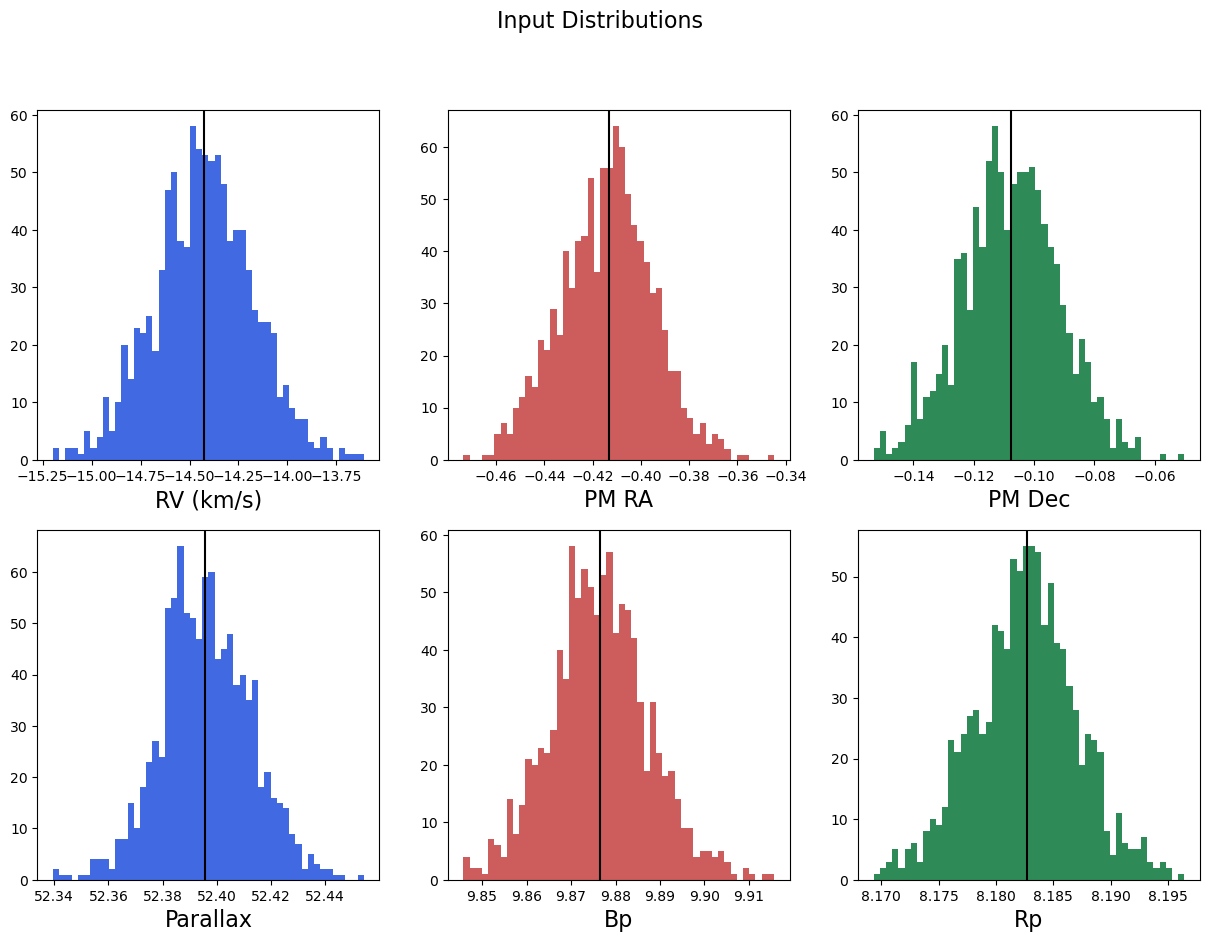

In [12]:
## plot the input arrays for GL710 to make sure we're using the right numbers

ID = int(np.where(source_id==4270814637616488064)[0])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(rv_array[ID,:],bins=50,color='royalblue')
ax2.hist(pmra_array[ID,:],bins=50,color='indianred')
ax3.hist(pmdec_array[ID,:],bins=50,color='seagreen')
ax4.hist(plx_array[ID,:],bins=50,color='royalblue')
ax5.hist(bp_array[ID,:],bins=50,color='indianred')
ax6.hist(rp_array[ID,:],bins=50,color='seagreen')

ax1.axvline(np.median(rv_array[ID,:]),color='black')
ax2.axvline(np.median(pmra_array[ID,:]),color='black')
ax3.axvline(np.median(pmdec_array[ID,:]),color='black')
ax4.axvline(np.median(plx_array[ID,:]),color='black')
ax5.axvline(np.median(bp_array[ID,:]),color='black')
ax6.axvline(np.median(rp_array[ID,:]),color='black')



ax1.set_xlabel('RV (km/s)', fontsize=16)
ax2.set_xlabel('PM RA', fontsize=16)
ax3.set_xlabel('PM Dec', fontsize=16)
ax4.set_xlabel('Parallax', fontsize=16)
ax5.set_xlabel('Bp', fontsize=16)
ax6.set_xlabel('Rp', fontsize=16)


print("Parallax:")
print(np.median(plx_array[ID,:]))

In [13]:
# This is a white dwarf whose RV needs to be corrected -- I have hard-coded 39.4 value. 
# Should update this! Via: 

# calculation here: https://www.wolframalpha.com/input?i=%28speed+of+light%29*%28%281-2*%28gravitational+constant%29*%280.7*%28mass+of+the+Sun%29%29%2F%28%281.234*%28radius+of+the+Earth%29%29*%28speed+of+light%29%5E2%29%29%5E%28-1%2F2%29-1%29

# and Here’s how I got the radius from log g and mass:
#https://www.wolframalpha.com/input?i=sqrt%280.7*%28mass+of+the+Sun%29%2F%28%2810%5E%288.177%29++centimeters%2Fsecond%5E2%29%2F%28gravitational+constant%29%29%29%2F%28radius+of+the+Earth%29

object_of_interest = np.where(source_id==5544743925212648320)
rv_array[object_of_interest,:] = rv_array[object_of_interest,:] - 39.4

## sanity check that this worked

print(np.mean(rv_array[object_of_interest,:]))

-412.87528855384124


In [1]:
# Calculate Bp_Rp color for each object in sample

Bp_Rp = phot_bp_mean_mag - phot_rp_mean_mag

NameError: name 'phot_bp_mean_mag' is not defined

In [15]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_array = np.sqrt(pmra_array**2+pmdec_array**2)
vtan_array = (c2/plx_array)*pmtot_array
vtot_array = (np.sqrt(vtan_array**2+rv_array**2))

Text(0.5, 0, 'v$_r$/v$_t$')

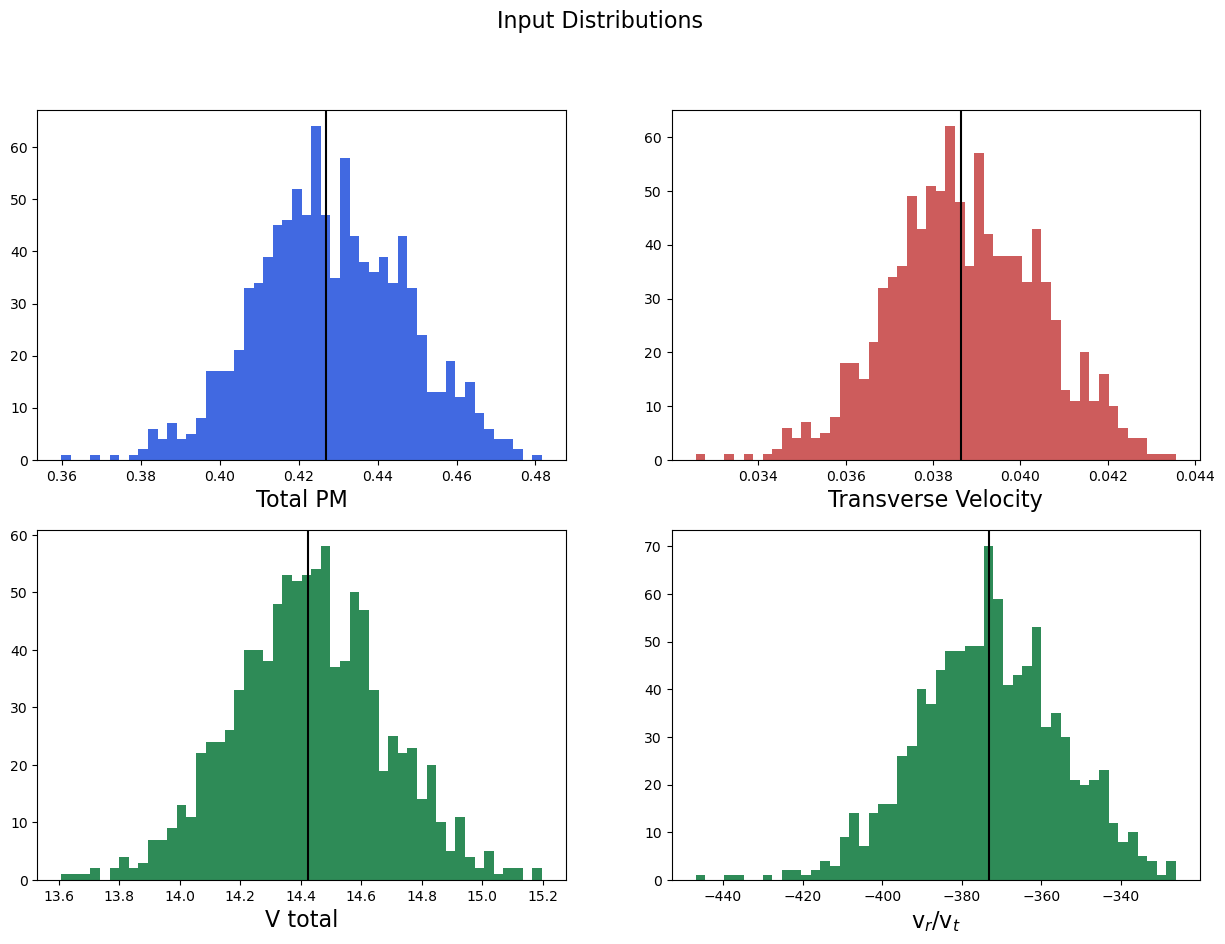

In [16]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(pmtot_array[ID,:],bins=50,color='royalblue')
ax2.hist(vtan_array[ID,:],bins=50,color='indianred')
ax3.hist(vtot_array[ID,:],bins=50,color='seagreen')
ax4.hist(rv_array[ID,:]/vtan_array[ID,:],bins=50,color='seagreen')

 
ax1.axvline(np.median(pmtot_array[ID,:]),color='black')
ax2.axvline(np.median(vtan_array[ID,:]),color='black')
ax3.axvline(np.median(vtot_array[ID,:]),color='black')
ax4.axvline(np.median(rv_array[ID,:]/vtan_array[ID,:]),color='black')


ax1.set_xlabel('Total PM', fontsize=16)
ax2.set_xlabel('Transverse Velocity', fontsize=16)
ax3.set_xlabel('V total', fontsize=16)
ax4.set_xlabel('v$_r$/v$_t$', fontsize=16)


### Resampling on perihelion time and distance

In [17]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_array = np.sqrt(pmra_array**2+pmdec_array**2)
vtan_array = (c2/plx_array)*pmtot_array
vtot_array = (np.sqrt(vtan_array**2+rv_array**2))




In [18]:
##### Caalculate the perihelion distance and perihelion time for our sample:


#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

print(plx_array.shape)
print(rv_array.shape)
print(vtot_array.shape)
print(vtan_array.shape)

## set up arrays for perihelion distance and time
t_per=plx_array * 0
d_per=plx_array * 0

for i in range(0,len(source_id)):
    t_per[i,:] = -c1*(1/plx_array[i,:])*(rv_array[i,:]/vtot_array[i,:]**2)
    d_per[i,:] = 10**3*(1/plx_array[i,:])*(vtan_array[i,:]/vtot_array[i,:])

#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

(167021, 1000)
(167021, 1000)
(167021, 1000)
(167021, 1000)


Source ID: 
4.270814637616488e+18
Perihelion Time (Myr) =    1.294 
 Range:    1.273 -    1.316 Myr
Perihelion Distance (pc) =    0.051 
 Range:    0.049 -    0.054 pc


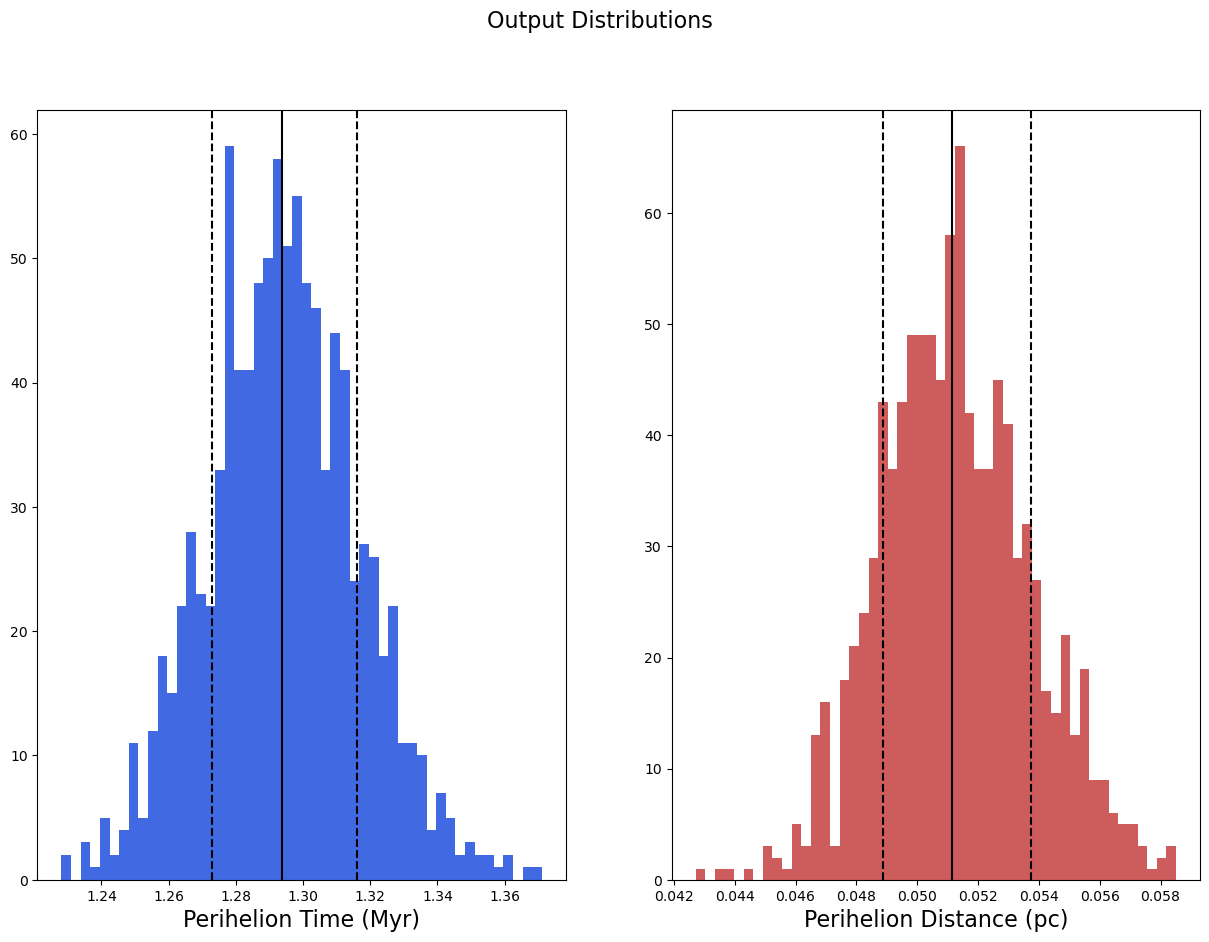

In [19]:
### plot a results for G710 to make sure we're getting the right numbers

ID = int(np.where(source_id==4270814637616488064)[0])


fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,10))
fig.suptitle('Output Distributions', fontsize=16)
ax1.hist(t_per[ID,:]/10**6,bins=50,color='royalblue')
ax2.hist(d_per[ID,:],bins=50,color='indianred')


 
ax1.set_xlabel('Perihelion Time (Myr)', fontsize=16)
ax2.set_xlabel('Perihelion Distance (pc)', fontsize=16)


ax1.axvline(np.median(t_per[ID,:]/10**6),color='black')
ax1.axvline(np.percentile(t_per[ID,:]/10**6,[16]),color='black',linestyle='dashed')
ax1.axvline(np.percentile(t_per[ID,:]/10**6,[84]),color='black',linestyle='dashed')


ax2.axvline(np.median(d_per[ID,:]),color='black')
ax2.axvline(np.percentile(d_per[ID,:],[16]),color='black',linestyle='dashed')
ax2.axvline(np.percentile(d_per[ID,:],[84]),color='black',linestyle='dashed')

print("Source ID: ")
print(source_id[ID])
print("Perihelion Time (Myr) = %8.3f \n Range: %8.3f - %8.3f Myr" % (np.median(t_per[ID,:]/10**6), np.percentile(t_per[ID,:]/10**6,[16]), np.percentile(t_per[ID,:]/10**6,[84])))
print("Perihelion Distance (pc) = %8.3f \n Range: %8.3f - %8.3f pc"% (np.median(d_per[ID,:]), np.percentile(d_per[ID,:],[16]), np.percentile(d_per[ID,:],[84])))

### J1416AB perihelion time calculation and impulse

In [171]:
#Calculates brown dwarf J1416AB perihelion values
BD_pmtot_array = np.sqrt(BD_PMR**2+BD_PMD**2)
BD_vtan_array = (4.74/BD_plx)*BD_pmtot_array
BD_vtot_array = (np.sqrt(BD_vtan_array**2+BD_rv**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [172]:
c1 = 0.9779*10**9
c2 = 4.74047

BD_pmtot_array = np.sqrt(BD_PMR**2+BD_PMD**2)
BD_vtan_array = (c2/BD_plx)*BD_pmtot_array
BD_vtot_array = (np.sqrt(BD_vtan_array**2+BD_rv**2))

### Error calculation for time and distance

In [22]:
#Creates an empty array so the upper quartile from the vtan mc has a place to put new values
empty_vtan_array = []
for i in range(0,len(source_id)):
    high = np.quantile(vtan_array[i], [.5])
    
    empty_vtan_array.append(high)

vtan = np.hstack(empty_vtan_array)

In [23]:
vtan[167020]

6.800154510435199

In [24]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion distance
upper_d_quantile_array = []
lower_d_quantile_array = []
for i in range(0,len(source_id)):
    high = np.quantile(d_per[i], [.95])
    low = np.quantile(d_per[i], [.05])
    
    upper_d_quantile_array.append(high)
    lower_d_quantile_array.append(low)

high_err = np.hstack(upper_d_quantile_array)
low_err = np.hstack(lower_d_quantile_array)



In [25]:
#upper limit of brown dwarf distance 
high_err[167020]

1.5038175566552727

In [26]:
low_err[167020] #lower limit of brown dwarf distance

1.4392255119518726

In [27]:
high_err[1561] #gliese 710

0.05554905795112453

In [28]:
low_err[1561] # gliese 710

0.047457858294922634

In [29]:
y_err = high_err - low_err

In [30]:
y_err[167020] #brown dwarf

0.06459204470340008

In [31]:
#Creates empty arrayes to put the upper quartile and lower quantile for the perihelion time
upper_t_quantile_array = []
lower_t_quantile_array = []
for i in range(0,len(source_id)):
    high = np.quantile(t_per[i], [.95])
    low = np.quantile(t_per[i], [.05])
    
    upper_t_quantile_array.append(high)
    lower_t_quantile_array.append(low)

th_err = np.hstack(upper_t_quantile_array)
tl_err = np.hstack(lower_t_quantile_array)

In [32]:
th_err[167020]/10**6 #this is the upper limit of brown dwarf time 

0.21310783944432346

In [33]:
tl_err[167020]/10**6 #this is the lower limit of brown dwarf time

0.20469967406997702

In [34]:
th_err[1561]/10**6 #gliese 710

1.3317759883099116

In [35]:
tl_err[1561]/10**6 #this is for gliese 710

1.2575313508969836

In [36]:
x_err = th_err - tl_err

In [37]:
high_err[1561]

0.05554905795112453

In [38]:
## calculate medians:
med_t_per = np.mean(t_per,axis=1)/10**6
med_d_per = np.mean(d_per,axis=1)
med_v_per = np.mean(vtot_array,axis=1)

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/3858947955.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], y_err[np.argsort(med_d_per)[0:25]], x_err[np.argsort(med_d_per)[0:25]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


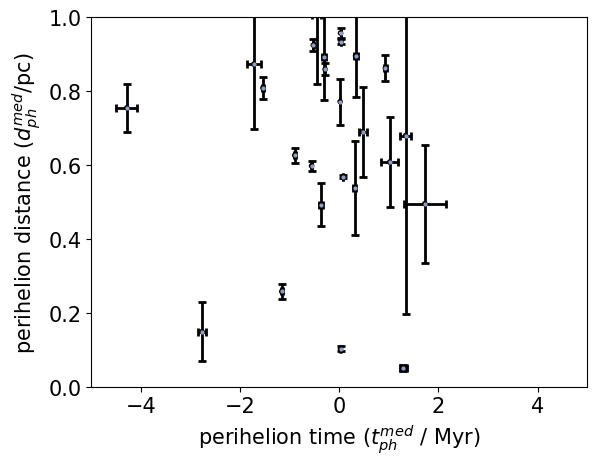

In [39]:
plt.scatter(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], facecolor = 'none', edgecolor = 'black', marker = ".")
plt.errorbar(med_t_per[np.argsort(med_d_per)[0:25]], med_d_per[np.argsort(med_d_per)[0:25]], y_err[np.argsort(med_d_per)[0:25]], x_err[np.argsort(med_d_per)[0:25]]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('DR3_StellarEncounters(Errors)_with_impulse.png', bbox_inches = "tight", facecolor='White')

plt.show()

# BD Monte Carlo

In [40]:
### Read in data file


GSampleBD = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_BD2 = Table(GSampleBD[1].data)

In [50]:
GSample_BD2

Name,f_Name,RAJ2000,DEJ2000,SpTl,Jmag,e_Jmag,J-Ks,e_J-Ks,pmRA,e_pmRA,pmDE,e_pmDE,Dist,e_Dist,RV-l,e_RV-l,r_SpTl,r_pmRA,r_Dist,r_RV-l,f_SpT,RV,e_RV,UVel,e_UVel,VVel,e_VVel,WVel,e_WVel,Prob,Pop,recno,SpT,Mass
str11,str1,str11,str12,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,str1,float32,float32,float32,float32,float32,float32,float32,float32,str5,str4,int16,str12,float64
J1438+6408,,14 38 08.26,+64 08 36.30,L0,12.99,0.02,1.34,0.03,643.8,0.4,-206.3,0.3,17.04,0.04,-45.0,3.0,733,753,753,760,,-45.0,3.0,64.0,0.5,11.5,1.9,-39.0,2.0,0.22,D/TD,88,L0,0.07729007634
J1731+2721,c,17 31 29.74,+27 21 23.20,L0,12.09,0.03,1.18,0.03,-90.2,0.2,-252.9,0.2,11.94,0.02,-29.76,0.11,717,753,753,761,,-29.76,0.11,6.28,0.06,-17.78,0.08,-6.62,0.05,0.01,D,115,L0,0.07729007634
J0024-0158,,00 24 24.63,-01 58 19.90,L0.5,11.99,0.04,1.45,0.04,-77.2,0.5,141.1,0.3,12.51,0.03,11.6,1.6,733,753,753,739,,11.65,1.6,9.4,0.2,25.8,0.7,0.8,1.4,0.01,D,5,L0.5,0.07729007634
J0746+2000,,07 46 42.49,+20 00 32.60,L0.5,11.76,0.02,1.29,0.03,-370.0,4.0,-42.0,1.0,11.6,0.6,52.37,0.06,703,741,744,761,,52.37,0.06,-43.3,0.5,-1.8,0.5,7.7,1.1,0.01,D,50,L0.5,0.07729007634
J1221+0257,,12 21 27.71,+02 57 19.70,L0.5,13.07,0.01,1.16,0.01,-145.4,0.5,-43.5,0.3,18.54,0.09,-8.79,0.14,731,753,753,761,,-8.79,0.14,0.96,0.07,6.67,0.08,-3.75,0.13,0.01,D,76,L0.5,0.07729007634
J0045+1634,b,00 45 21.41,+16 34 44.70,L0{beta},13.06,0.02,1.69,0.03,358.9,0.4,-48.1,0.2,15.38,0.05,3.3,0.2,739,753,753,761,,3.29,0.17,-10.8,0.1,-1.89,0.12,1.82,0.12,0.01,D,9,L0{beta},0.07729007634
J0015+3516,,00 15 44.77,+35 16 02.60,L1,13.88,0.03,1.62,0.04,55.2,0.5,-257.1,0.3,17.06,0.11,-37.4,0.2,733,753,753,761,,-37.35,0.16,28.01,0.07,-27.23,0.14,5.31,0.14,0.01,D,3,L1,0.07251908397
J0751-2530,,07 51 16.30,-25 30 43.00,L1,13.16,0.02,1.17,0.03,-879.0,0.2,146.0,0.2,17.68,0.05,32.0,2.0,733,753,753,747,,32.0,2.0,-46.9,0.9,5.9,1.8,-49.26,0.16,0.44,D/TD,51,L1,0.07251908397
J0921-2104,,09 21 14.10,-21 04 44.40,L1,12.78,0.02,1.09,0.03,245.9,0.3,-911.6,0.3,12.61,0.04,80.53,0.11,731,753,753,761,,80.53,0.11,31.37,0.13,-83.91,0.12,11.14,0.08,2.99,D/TD,58,L1,0.07251908397


In [54]:
#dfBD = GSample_BD2.to_pandas()

In [55]:
#dfBD

In [60]:
## pull out variables on interest from the brown dwarf file

#radial velocity
rvbd = np.asarray(GSample_BD2["RV"])

rv_ebd = np.asarray(GSample_BD2["e_RV"]) 


# PM RA and Dec
PMDbd = np.asarray(GSample_BD2['pmDE'])
PMRbd = np.asarray(GSample_BD2['pmRA'])
PMR_ebd = np.asarray(GSample_BD2['e_pmRA'])
PMD_ebd = np.asarray(GSample_BD2['e_pmDE'])

#RA and DEc ICRS
dbd = np.asarray(GSample_BD2['Dist'])
plxbd = (1/dbd)*1000
d_ebd = np.asarray(GSample_BD2['e_Dist'])
#parallax
plxbd = np.asarray(plxbd)

#median distanc

## read in temperature
#teff=np.asarray(GSample_A2['teff_gspphot'])
## temperature has no error

source_idbd = np.asarray(GSample_BD2["Name"])

#name colomn
#Namebd = np.asarray(GSample_BD2['Name'])

Massbd = np.asarray(GSample_BD2['Mass'])

In [116]:
sdbd = dbd+d_ebd
splxbd = (1/sdbd)*1000

In [117]:
plx_ebd = -splxbd + plxbd

In [118]:
### Create arrays for everything
npts        = 1000
rv_arraybd    = np.zeros((len(GSample_BD2),npts))
pmra_arraybd  = rv_arraybd*0
pmdec_arraybd = rv_arraybd*0
plx_arraybd   = rv_arraybd*0
bp_arraybd    = rv_arraybd*0
rp_arraybd    = rv_arraybd*0

for i in range(0,len(GSample_BD2)):
    rv_arraybd[i,:] = np.random.normal(rvbd[i],rv_ebd[i],npts)
    pmra_arraybd[i,:] = np.random.normal(PMRbd[i],PMR_ebd[i],npts)
    pmdec_arraybd[i,:] = np.random.normal(PMDbd[i],PMD_ebd[i],npts)
    plx_arraybd[i,:] = np.random.normal(plxbd[i],plx_ebd[i],npts)

Parallax:
115.08347484551226


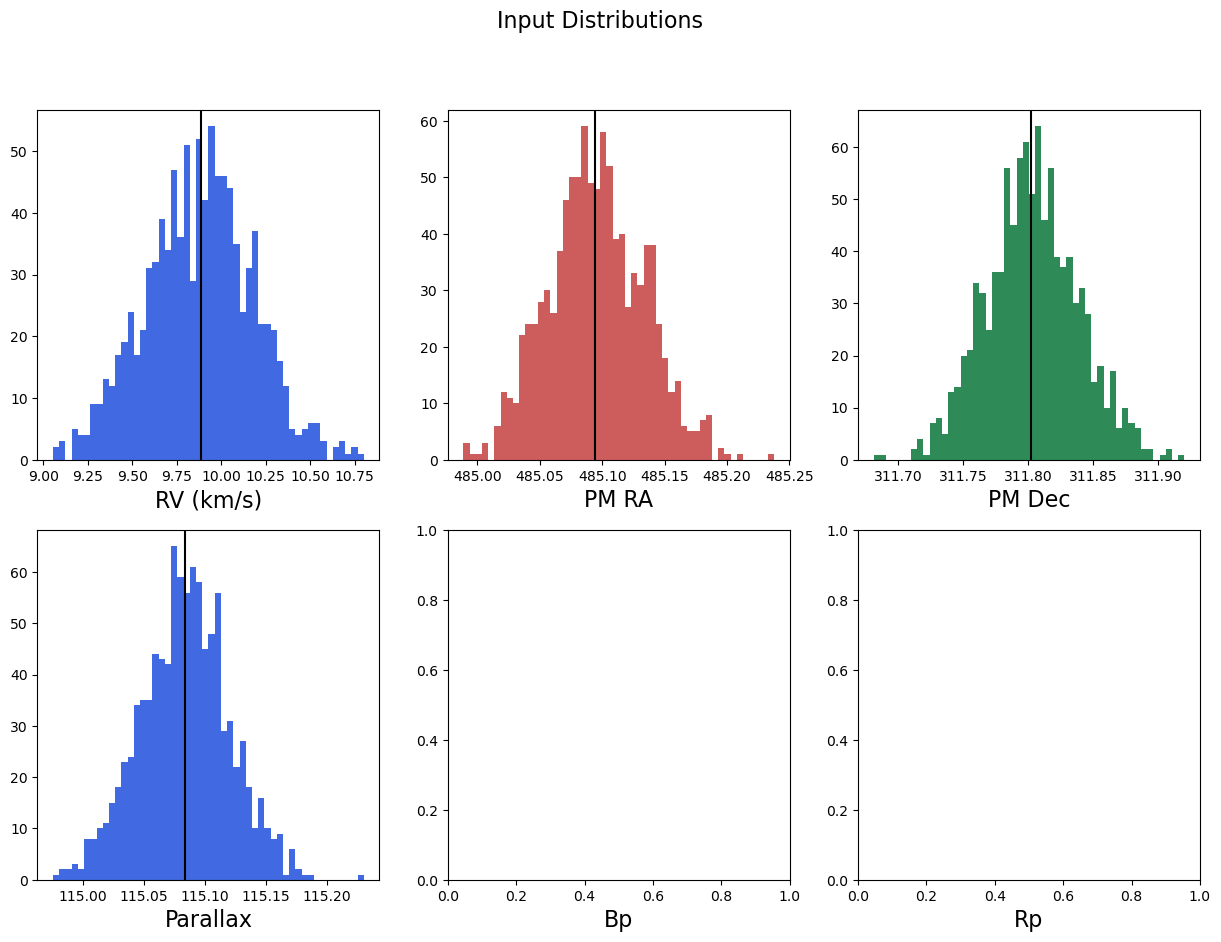

In [119]:
## plot the input arrays for GL710 to make sure we're using the right numbers

ID = int(np.where(source_idbd=='J0109-0343')[0])


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('Input Distributions', fontsize=16)
ax1.hist(rv_array[ID,:],bins=50,color='royalblue')
ax2.hist(pmra_array[ID,:],bins=50,color='indianred')
ax3.hist(pmdec_array[ID,:],bins=50,color='seagreen')
ax4.hist(plx_array[ID,:],bins=50,color='royalblue')

ax1.axvline(np.median(rv_array[ID,:]),color='black')
ax2.axvline(np.median(pmra_array[ID,:]),color='black')
ax3.axvline(np.median(pmdec_array[ID,:]),color='black')
ax4.axvline(np.median(plx_array[ID,:]),color='black')

ax1.set_xlabel('RV (km/s)', fontsize=16)
ax2.set_xlabel('PM RA', fontsize=16)
ax3.set_xlabel('PM Dec', fontsize=16)
ax4.set_xlabel('Parallax', fontsize=16)
ax5.set_xlabel('Bp', fontsize=16)
ax6.set_xlabel('Rp', fontsize=16)

print("Parallax:")
print(np.median(plx_array[ID,:]))

In [120]:
### calculate pmtot, vtan, vtot arrays: (takes a long time with MC sampling)
c1 = 0.9779*10**9
c2 = 4.74047

pmtot_arraybd = np.sqrt(pmra_arraybd**2+pmdec_arraybd**2)
vtan_arraybd = (c2/plx_arraybd)*pmtot_arraybd
vtot_arraybd = (np.sqrt(vtan_arraybd**2+rv_arraybd**2))





In [121]:
##### Caalculate the perihelion distance and perihelion time for our sample:


#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

print(plx_arraybd.shape)
print(rv_arraybd.shape)
print(vtot_arraybd.shape)
print(vtan_arraybd.shape)

## set up arrays for perihelion distance and time
t_perbd=plx_arraybd * 0
d_perbd=plx_arraybd * 0

for i in range(0,len(source_idbd)):
    t_perbd[i,:] = -c1*(1/plx_arraybd[i,:])*(rv_arraybd[i,:]/vtot_arraybd[i,:]**2)
    d_perbd[i,:] = 10**3*(1/plx_arraybd[i,:])*(vtan_arraybd[i,:]/vtot_arraybd[i,:])

#t = -c1*(1/plx)*(rv/vtot**2)
#d = 10**3*(1/plx)*(vtan/vtot)

(136, 1000)
(136, 1000)
(136, 1000)
(136, 1000)


In [122]:
#Same as last time creates empty arrays from brown dwarf sample

high_d_bd_quantile = []
low_d_bd_quantile = []
for i in range(0,len(source_idbd)):
    highbd = np.quantile(d_perbd[i], [.95])
    lowbd = np.quantile(d_perbd[i], [.05])
    
    high_d_bd_quantile.append(highbd)
    low_d_bd_quantile.append(lowbd)

high_errbd = np.hstack(high_d_bd_quantile)
low_errbd = np.hstack(low_d_bd_quantile)


In [123]:
y_errbd = high_errbd - low_errbd

In [124]:

high_t_bd_quantile = []
low_t_bd_quantile = []
for i in range(0,len(source_idbd)):
    highbd = np.quantile(t_perbd[i], [.95])
    lowbd = np.quantile(t_perbd[i], [.05])
    
    high_t_bd_quantile.append(highbd)
    low_t_bd_quantile.append(lowbd)

th_errbd = np.hstack(high_t_bd_quantile)
tl_errbd = np.hstack(low_t_bd_quantile)

In [125]:
x_errbd = th_errbd - tl_errbd

In [126]:
rv[np.argsort(med_d_per)[0:10]]

array([ -14.419984817504883, -373.7366638183594  ,   26.75624656677246 ,
         82.47994995117188 ,  195.67918395996094 ,  -47.449195861816406,
       -264.4064636230469  ,  -82.91139221191406 ,   70.3505630493164  ,
        -37.17289733886719 ])

In [127]:
med_d_per[np.argsort(med_d_per)[0:10]]

array([0.05125413273099153, 0.10279019006752879, 0.1497125767101827 ,
       0.25826437181606055, 0.49333467912580364, 0.4957727698037375 ,
       0.5381230126501855 , 0.5689668280815152 , 0.5980172256612245 ,
       0.6084577269042208 ])

In [128]:
## calculate medians: from brown dwarf sample
med_t_perbd = np.mean(t_perbd,axis=1)/10**6
med_d_perbd = np.mean(d_perbd,axis=1)
med_v_perbd = np.mean(vtot_arraybd,axis=1)

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/3011284750.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], y_errbd[np.argsort(med_d_perbd)[0:25]], x_errbd[np.argsort(med_d_perbd)[0:25]]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


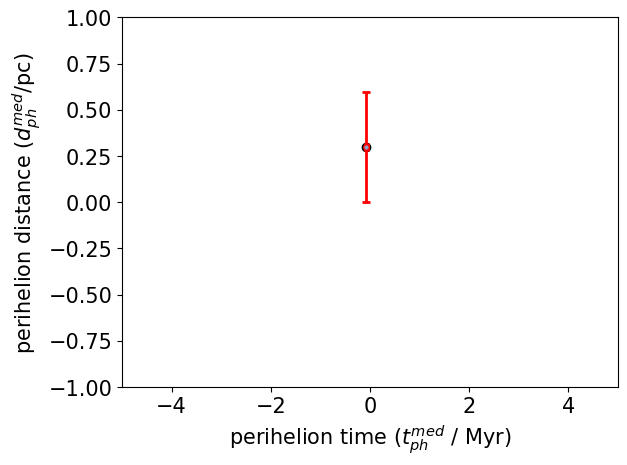

In [129]:
plt.scatter(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], facecolor = 'red', edgecolor = 'black')
plt.errorbar(med_t_perbd[np.argsort(med_d_perbd)[0:25]], med_d_perbd[np.argsort(med_d_perbd)[0:25]], y_errbd[np.argsort(med_d_perbd)[0:25]], x_errbd[np.argsort(med_d_perbd)[0:25]]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(-1,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

A brown dwarf in our very own solar system??????
The lower limit of the source is NAN this is more than likely a computational error but still worth the follow up.

In [130]:
#rv of brown dwrf
rvbd[135]

-3.3

In [131]:
#error of brown dwarf
rv_ebd[135]

0.4

In [132]:
PMDbd[135]

nan

In [133]:
high_errbd

array([13.74458329575315  ,  5.467166125088593 ,  9.028134071620418 ,
        4.911931183789855 , 15.68767380403984  , 15.351746778231156 ,
        8.608800746798073 , 16.531815102913683 ,  7.3025174314698935,
       12.514273234199202 , 13.96200943437019  ,  9.850671002671055 ,
       14.225584054607298 , 15.019071099158925 , 14.661323448813905 ,
       14.478346828409844 , 10.232486274206398 , 17.649021984268494 ,
       13.799390356198609 , 13.39858900813114  ,  9.994997658750098 ,
       11.311674212487517 , 18.225739850878913 , 15.168179198580546 ,
        9.16272304080625  , 16.97515880142915  , 16.23456305917794  ,
       18.48664366708115  ,  8.905852698351008 , 12.816336360130007 ,
       16.990500626598916 , 15.130445230805018 ,  8.306845106759624 ,
        4.650874564554123 , 17.330676104182412 , 11.744567063580787 ,
       18.84387112824217  ,  6.6225056288478665,  8.538668882736026 ,
        7.683918256004206 ,  6.814929386885829 , 19.14557798725265  ,
       18.0084162047

In [134]:
x_errbd

array([   6710.960545413545  ,    2609.717228932481  ,
         51291.5509968017    ,   22391.467454479658  ,
         15743.46259580017   ,   11124.411555711958  ,
          4115.286156020127  ,   11865.997107277377  ,
           407.78966179482813,    1182.1115993879503 ,
         11585.708473789418  ,     499.9144270556135 ,
          1632.6798254284658 ,    8760.831901001395  ,
        254280.0137824106    ,    3930.0598152227467 ,
          8339.16896147374   ,   14507.615973221065  ,
           563.9325909437393 ,     679.1116410116956 ,
         78263.37245543813   ,    1894.8935613865033 ,
           890.9949162372359 ,    6612.776218639308  ,
           498.18327724575647,    3104.1660620863768 ,
          2299.963925054093  ,   28182.534483067735  ,
          2612.8712255436694 ,    2410.924176991626  ,
         14470.334490033943  ,   26165.262501682853  ,
           110.51544523089251,   26008.820085282438  ,
          7864.187759751367  ,    1160.3961781831235 ,
         1

In [135]:
source_idbd[np.argsort(med_d_perbd)[0:10]]

array(['J0720-0846', 'J0253+1652', 'J0435-1606', 'J1845-6357B',
       'J1048-3956', 'J0429-3123A', 'J0255-4700', 'J0835-0819',
       'J0746+2000', 'J2057-0252'], dtype='<U11')

In [136]:
[np.argsort(med_d_perbd)[0:10]]

[array([130,  71, 113, 110, 119,  78,  69,  60,   3,  33])]

In [137]:
med_d_perbd[130]

0.298487330363125

### Ta dah! Now we have calculated the perihelion distance and times for all the stars in our sample

### Next we need to estimate masses for everything so that we can calculate impulses for each target:

In [138]:
def value(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [139]:
## Read in Bp-Rp from Mamajek file.
M_bprp = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt', usecols=(11), comments='#', dtype='str',  converters={11: value})
M_bprp = M_bprp.astype('float64')
print(len(M_bprp))

## read in mass from Mamajek file
M_mass = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(30), comments='#',dtype='str',  converters={30: value})
M_mass = M_mass.astype('float64')
print(len(M_mass))

## read in teff from Mamajek file
M_teff = np.loadtxt('/Users/edm/Desktop/Stellar Flybys/Gaia Data/EEM_dwarf_UBVIJHK_colors_Teff.txt',usecols=(1), comments='#',dtype='str',  converters={1: value})
M_teff = M_teff.astype('float64')
print(len(M_teff))


118
118
118


In [140]:
M_mass=M_mass[6:87]
M_teff=M_teff[6:87]
M_bprp=M_bprp[6:87]

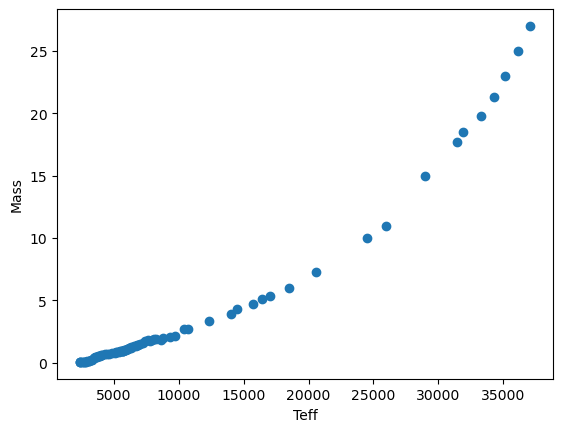

In [141]:
#concatanating 1d arrays code does not iterate over float
#scatter = plt.scatter(new_data2,new_data)

scatter = plt.scatter(M_teff,M_mass)
plt.xlabel('Teff')
plt.ylabel('Mass')
plt.show()




Text(0, 0.5, 'Teff')

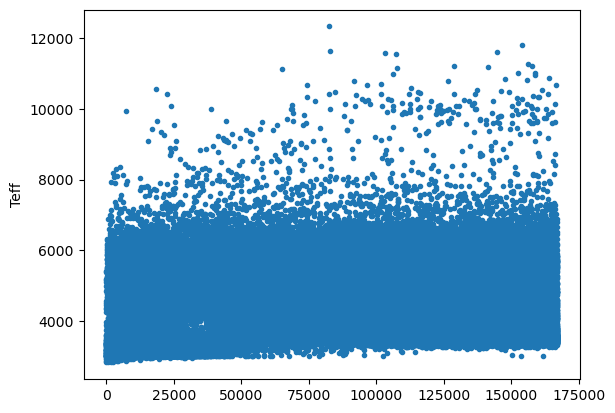

In [142]:
## plot Gaia teff values to understand their range etc.

plt.plot(teff,marker='.',linestyle='None')
plt.ylabel('Teff')

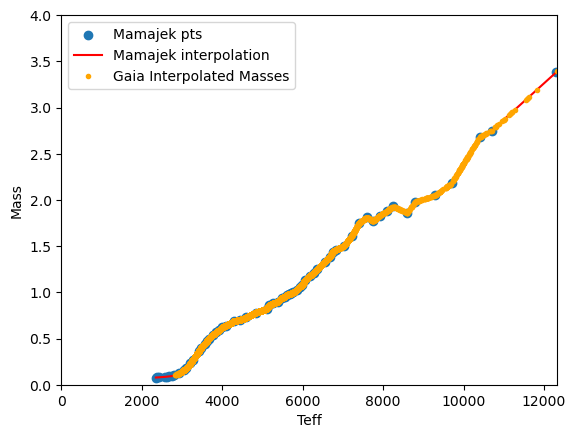

In [143]:
## use interpolation to figure out the match between T and M

f = interpolate.interp1d(M_teff,M_mass)
#top_press_P1 - top_press_P2


#xnew = np.log10(top_press_P1)
new_mass=f(M_teff)


scatter = plt.scatter(M_teff,M_mass,label='Mamajek pts')
plt.plot(M_teff,f(M_teff),color='red',label='Mamajek interpolation')
plt.plot(teff,f(teff),color='orange',label='Gaia Interpolated Masses',linestyle='None',marker='.')
plt.xlabel('Teff')
plt.ylabel('Mass')
plt.legend()
plt.ylim(0,4)
plt.xlim(0,max(teff))
plt.show()



In [144]:
## use interpolated function to calculate masses from temperatures:
Mass = f(teff)




In [145]:
Bp_Rp.shape

(167021,)

In [146]:
## Gliese 710 doesn't have a teff, so therefore the mass
G710 = np.where(source_id==4270814637616488064)


print(Mass[G710])
print(teff[G710])
print((Bp_Rp[G710]))
#print(Bp_Rp.shape)

[nan]
[nan]
[1.6937250000000006]


In [147]:
print(np.count_nonzero(np.isnan(Mass)))

print(np.count_nonzero(np.isnan((Bp_Rp))))

## ok there are a lot of nans!!! for objects with nan Teff values, use Bp_Rp to calculate Mass




73614
1513


In [148]:
## have to trim arrays again because BP_Rp has zeros at beginning

M_bprp=M_bprp[18:]
M_teff=M_teff[18:]
M_mass=M_mass[18:]

nans = np.where(np.isnan(teff))


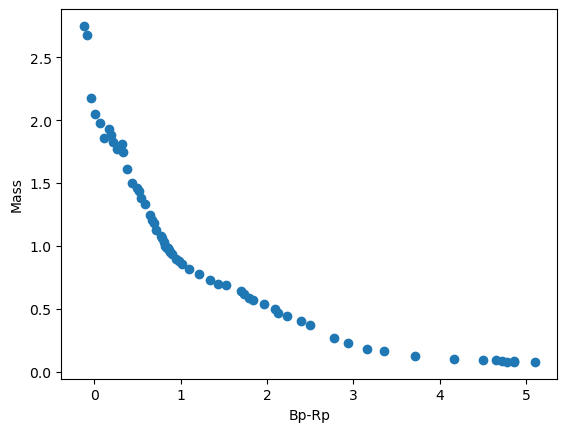

2.75


In [149]:
### do the same interpolation with Bp_Rp for objects with nans:

scatter = plt.scatter(M_bprp,M_mass)
plt.xlabel('Bp-Rp')
plt.ylabel('Mass')
plt.show()

print(max(M_mass))


In [150]:
#interpolation will only work where Bp_Rp is within range of Mamajek values, so remove any

print(min(Bp_Rp))
print(min(M_bprp))



nans_bprp = np.where((np.isnan(teff)) & (Bp_Rp > min(M_bprp)))
#print(nans_bprp)

-0.47897249999999936
-0.12


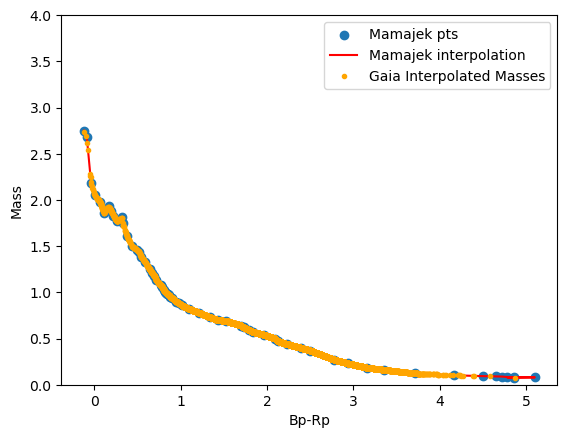

In [151]:
## use interpolation to figure out the match between T and M

f2 = interpolate.interp1d(M_bprp,M_mass)
#top_press_P1 - top_press_P2


#xnew = np.log10(top_press_P1)
#new_mass=f2(M_bprp)


scatter = plt.scatter(M_bprp,M_mass,label='Mamajek pts')
plt.plot(M_bprp,f2(M_bprp),color='red',label='Mamajek interpolation')
plt.plot(Bp_Rp[nans_bprp],f2(Bp_Rp[nans_bprp]),color='orange',label='Gaia Interpolated Masses',linestyle='None',marker='.')
plt.xlabel('Bp-Rp')
plt.ylabel('Mass')
plt.legend()
plt.ylim(0,4)
#plt.xlim(0,max(bprp))
plt.show()





Mass[nans_bprp] = f2(Bp_Rp[nans_bprp])



In [152]:
## How many objects without masses are left???

print(np.count_nonzero(np.isnan(Mass)))
print(Mass[G710])

1515
[0.6418455882352939]


In [153]:
Mass[167020] # mass of the brown dwarf system in kilograms

0.07808660833333333

In [154]:
#np.argmax(y_err[np.argsort(med_d_per)[0:10]])

In [155]:
np.where(y_err == 4.9858768445550385)

(array([], dtype=int64),)

In [156]:
### calculate impulses for each target using the median values for t_per, d_per and v_per:

## set up impulse arrays:
impulse1 = np.zeros(len(source_id))
impulse2 = impulse1 * 0


## calculate impulse values:
for i in range(0,len(source_id)):
    impulse1[i] = Mass[i]/(med_d_per[i]*med_v_per[i])



In [157]:
impulse1bd = Massbd/(med_d_perbd*med_v_perbd)

In [158]:
### calculate impulses for each target using the median values for t_per, d_per and v_per:
### Distant tide approximation
## set up impulse arrays:
impulse3 = np.zeros(len(source_id))
impulse4 = impulse3 * 0

med_d_per2 = med_d_per**2

## calculate impulse values:
for i in range(0,len(source_id)):
    impulse3[i] = Mass[i]/(med_d_per2[i]*med_v_per[i])

In [159]:
BD_t = (-c1*(1/BD_plx)*(BD_rv/BD_vtot_array**2))
BD_d = 10**3*(1/BD_plx)*(BD_vtan_array/BD_vtot_array)

In [160]:
med_d_per[167020]

1.470998940874514

In [161]:
med_t_per[167020]

0.20886580914678632

In [162]:
impulse1[167020]

0.0012369412876592758

In [163]:
BD_MASS = (20.38*np.exp(-2.92*BD_Bp_Rp) + .48)

In [164]:
BD_abs_mag = 18.353840 + 5*(np.log10(BD_plx))
BD_abs_mag

28.515674468598334

In [165]:
np.argmax(y_err)

164106

In [166]:
source_id[161120]

5.49043801081691e+18

In [167]:
source_id[np.argsort(med_d_per)[0:10]]

array([4.2708146376164879e+18, 5.5447439252126484e+18,
       5.1091161856923904e+17, 5.5712321180900823e+18,
       9.2978837150881229e+17, 3.3721040352754831e+18,
       4.1164513783889516e+18, 1.9528024699185544e+18,
       3.0545094100986721e+18, 3.6003380819859978e+18])

# Plots after Monte Carlo

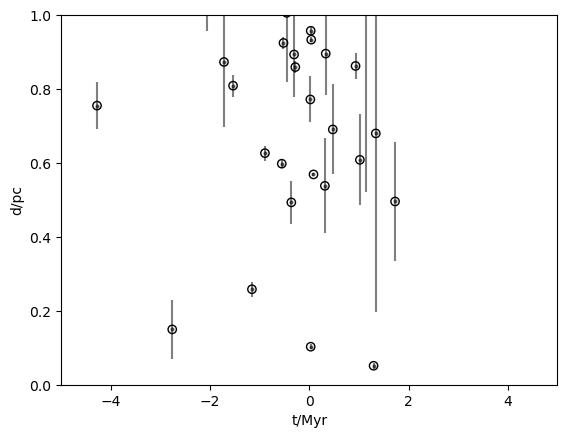

In [168]:
plt.scatter(med_t_per[np.argsort(med_d_per)[0:30]], med_d_per[np.argsort(med_d_per)[0:30]], facecolor = 'none', edgecolor = 'black')
plt.errorbar(med_t_per[np.argsort(med_d_per)[0:30]], med_d_per[np.argsort(med_d_per)[0:30]], y_err[np.argsort(med_d_per)[0:30]], alpha = .5, ecolor='black', fmt='ko', markersize = 2)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("t/Myr")
plt.ylabel("d/pc")
plt.show()

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/3836466857.py:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = '+')


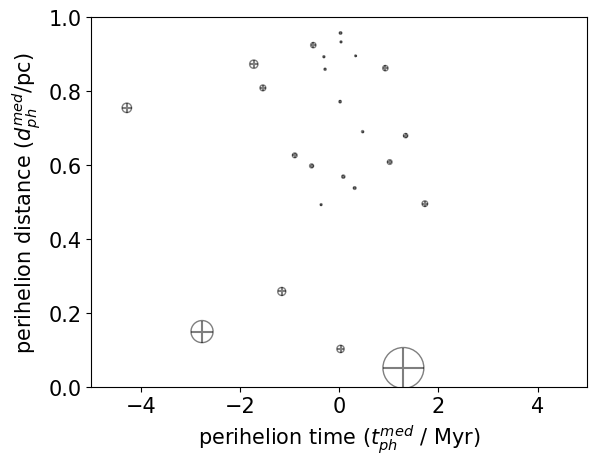

In [174]:

plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = '+')

ymin, ymax = plt.ylim(0,1)
xmin, xmax = plt.xlim(-5,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('DR3_StellarEncounters(noBD)_with_impulse.png', bbox_inches = "tight", facecolor='White')


plt.show()

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/1556356739.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], y_errbd[med_d_perbd <= 1], x_errbd[med_d_perbd <= 1]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)
/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/1556356739.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(med_t_per[med_d_per <= 1], med_d_per[med_d_per <= 1], y_err[med_d_per <= 1], x_err[med_d_per <= 1]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)


(array([0.                , 0.2               , 0.4               ,
        0.6000000000000001, 0.8               , 1.                ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

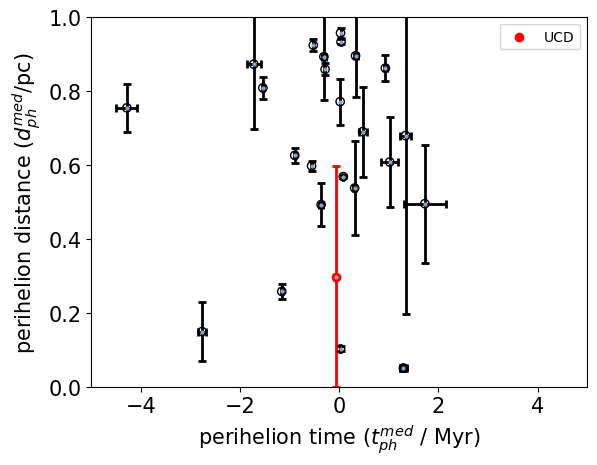

In [175]:
plt.scatter(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], facecolor = 'red', edgecolor = 'red', label='UCD')
plt.legend()
plt.errorbar(med_t_perbd[med_d_perbd <= 1], med_d_perbd[med_d_perbd <= 1], y_errbd[med_d_perbd <= 1], x_errbd[med_d_perbd <= 1]/10**6, ecolor='red', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

plt.scatter(med_t_per[med_d_per <= 1], med_d_per[med_d_per < 1], facecolor = 'none', edgecolor = 'black')
plt.errorbar(med_t_per[med_d_per <= 1], med_d_per[med_d_per <= 1], y_err[med_d_per <= 1], x_err[med_d_per <= 1]/10**6, ecolor='black', fmt='ko', label='label',color="#8da0cb", capthick=2, elinewidth=2, markersize = 2,capsize=3)

xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,1)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.savefig('DR3_StellarEncounters_no_impulse.png', bbox_inches = "tight", facecolor='White')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [176]:
np.argmin(med_d_perbd)

135

In [177]:
np.nanargmin(med_d_perbd)

130

In [178]:
med_d_perbd[130]

0.298487330363125

In [179]:
y_errbd[130]

0.29872792726982256

In [180]:
high_errbd[130]

0.4818821158538648

In [181]:
low_errbd[130]

0.18315418858404223

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/722638104.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 500*impulse3, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')


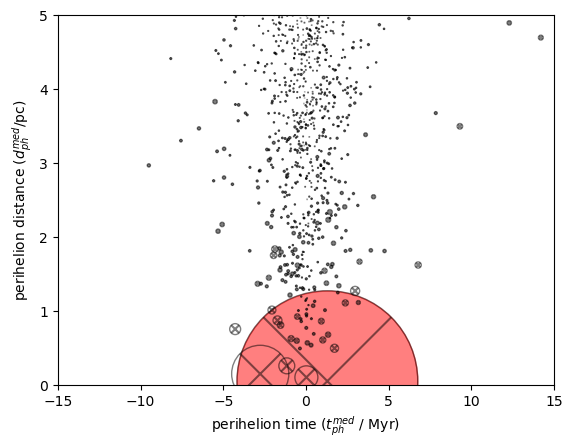

In [182]:

plt.scatter(med_t_per[1561], med_d_per[1561], s = 1000*impulse3[1561], alpha = .5, facecolor = 'red', edgecolor = 'red')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse3, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 500*impulse3, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.show()

In [183]:
### Read in data file

GSample1bd = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/Mass Bd sampls (dino).fits')
GSample_A2bd = Table(GSample1bd[1].data)

In [184]:
## pull out variables on interest

#radial velocity
Rvelbd = np.asarray(GSample_A2bd["RV"])
rvbd=Rvelbd

rv_ebd = np.asarray(GSample_A2bd["e_RV"]) 


# PM RA and Dec
bdPMD = np.asarray(GSample_A2bd['pmDE'])
bdPMR = np.asarray(GSample_A2bd['pmRA'])
bdPMR_e = np.asarray(GSample_A2bd['e_pmRA'])
bdPMD_e = np.asarray(GSample_A2bd['e_pmDE'])

#parallax
bdplx = 1000/np.asarray(GSample_A2bd['Dist'])
bdplx_e = 1/np.asarray(GSample_A2bd['e_Dist'])

bdMass = np.asarray(GSample_A2bd['Mass'])

In [185]:
#uses new median values for the arrays
BD1_pmtot_array = np.sqrt(bdPMR**2+bdPMD**2)
BD1_vtan_array = (4.74/bdplx)*BD1_pmtot_array
BD1_vtot_array = (np.sqrt(BD1_vtan_array**2+rvbd**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [186]:
BD_t = (-c1*(1/bdplx)*(rvbd/BD1_vtot_array**2))/10**6
BD_d = 10**3*(1/bdplx)*(BD1_vtan_array/BD1_vtot_array)

In [187]:
BDimpulse1 = bdMass/(BD_d**2*BD1_vtot_array)

In [188]:
BDimpulse1

array([0.000006316948239213683 , 0.0000784500248860616   ,
       0.00008174601763385572  , 0.00007704431419444675  ,
       0.00002019134203277823  , 0.000012473381203045178 ,
       0.00002368416810290589  , 0.000003380178883177639 ,
       0.000014081101841690918 , 0.000010935345509979962 ,
       0.000004117332957855682 , 0.000013882048776705606 ,
       0.000009213751352529594 , 0.000017178002302430935 ,
       0.000035161313218886325 , 0.0000079719669715571   ,
       0.000026346351099323888 , 0.000011829208494316138 ,
       0.00000384622056441071  , 0.000005102925458366269 ,
       0.000029874447689535548 , 0.000018765808663958923 ,
       0.0000022866519054240357, 0.000012349816956868921 ,
       0.000021076779151196025 , 0.000006149843270391874 ,
       0.000004867931597160115 , 0.000015536107700829122 ,
       0.00005504377417998928  , 0.000004838109447576487 ,
       0.000005058965101119635 , 0.000012557148523064094 ,
       0.000016753778954854196 , 0.00013776085652177664 

/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/4276227847.py:2: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
/var/folders/p7/1jqm_mnx32q55mjfkdmwpm5h0000gn/T/ipykernel_2397/4276227847.py:5: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(med_t_per, med_d_per, s = 500*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')


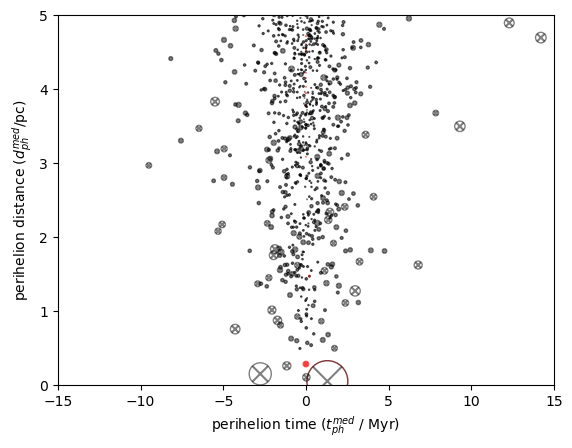

In [189]:

plt.scatter(BD_t/10**6, BD_d, s = 1000*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red')
plt.scatter(BD_t/10**6, BD_d, s = 500*BDimpulse1, alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(med_t_per[1561], med_d_per[1561], s = 1000*impulse1[1561], alpha = .5, facecolor = 'none', edgecolor = 'red')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = .5, facecolor = 'none', edgecolor = 'black')
plt.scatter(med_t_per, med_d_per, s = 500*impulse1, alpha = .5, facecolor = 'black', edgecolor = 'black', marker = 'x')
plt.scatter(med_t_per[167020], med_d_per[167020], s = 1000*impulse1[167020], alpha = .5, facecolor = 'none', edgecolor = 'red')
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.show()

In [ ]:
GSample_A2.loc[np.argsort(med_d_per)[0:10]]

In [ ]:

plt.figure(figsize=(10, 10))
plt.scatter(med_t_per[167020], med_d_per[167020], s = 10000*impulse3[167020], alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(BD_t[BD_d >= 1], BD_d[BD_d >= 1], s = 1000*BDimpulse1[BD_d >= 1], alpha = .5, facecolor = 'none', edgecolor = 'red')
plt.scatter(BD_t[BD_d >= 1], BD_d[BD_d >= 1], s = 500*BDimpulse1[BD_d >= 1], alpha = .5, facecolor = 'red', edgecolor = 'red', marker = 'x')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse3, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v_per, vmin=0, vmax=100, cmap='viridis')

plt.plot(np.arange(-20,20,1), np.zeros(40)+med_d_per[0],color='black')
plt.text(-14.8,1,'Oort Cloud Outer Radius')
plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.text(-14.8,1.4,'Proxima Cen Today')
plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.text(-14.8,1.4,'Proxima Cen Today')
cbartitle = plt.colorbar()
cbartitle.set_label('total $velocity^{med}_{ph}$(km/s)')

xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)
plt.yscale('log')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)




### Done!!

In [ ]:
#### overplot an object of interest if you know the Gaia DR3 ID

#object_of_interest = np.where(source_id==5853498713190525696)

plt.figure(figsize=(10, 10))


plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black')
plt.plot(np.zeros(100), np.arange(0,100),color='black')

plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = 1, edgecolor = 'none', facecolor = 'none', c = med_v_per, vmin=0, vmax=100, cmap='viridis')
#plt.scatter(t[0]/10**6, d[0], s = 1000*area[0], alpha = 1, edgecolor = 'none', facecolor = 'none', c = 'green')
plt.plot(med_t_per[object_of_interest]/10**6, med_d_per[object_of_interest],marker='o',color='red')


plt.text(-2.8,1.4,'Proxima Centauri Today')

for i in range(0,100):
    plt.plot([0, med_t_per[np.argsort(-1*plx)[i]]], [1/(plx[np.argsort(-1*plx)[i]]/1000),med_d_per[np.argsort(-1*plx)[i]]],marker='.',color='red',alpha=0.1,linestyle='-')

    
    1/(plx[np.argsort(-1*plx)[0:10]]/1000)


cbartitle = plt.colorbar()
cbartitle.set_label('transverse $velocity^{med}_{ph}$(km/s)')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
xmin, xmax = plt.xlim(-3,3)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)")
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)")
plt.yscale('log')
#plt.xscale('log')
plt.legend()



In [ ]:
med_d_per[1561]

In [ ]:
source_id[167020]

In [ ]:
med_t_per[1561]

In [ ]:
#### overplot an object of interest if you know the Gaia DR3 ID

#object_of_interest = np.where(source_id==5544743925212648320)

fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#area = (Mass)/(d*vtot)

plt.plot(np.arange(-20,20,1), np.zeros(40)+1.3,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+0.969627362,color='black',linestyle='dashed',zorder=0)
plt.plot(np.arange(-20,20,1), np.zeros(40)+2,color='black',linestyle='dashed',zorder=0)
#plt.plot(np.zeros(100), np.arange(0,100),color='black',linestyle='dashed',zorder=0)


#plt.gca().add_patch(Rectangle((-0.5,1),1,3,fill=False, color='black', linestyle = 'solid'))
#plt.annotate("J1416AB", (4.85,0.0512), color='black', weight='bold', fontsize=10, ha='center', va='center')
plt.scatter(med_t_perbd, med_d_perbd, s = 1000*impulse1bd, facecolor = 'red', edgecolor = 'red', label='UCD Sample')
#plt.scatter(med_t_perbd[130], med_d_perbd[130], s = 1000*impulse1bd[130], facecolor = 'red', edgecolor = 'red', label='UCD Sample')
plt.scatter(med_t_per, med_d_per, s = 1000*impulse1, alpha = 1, edgecolor = 'none', facecolor = 'none', c = np.abs(rv), vmin=0, vmax=100, cmap='viridis')
plt.scatter(med_t_per[167020], med_d_per[167020], s = 1000*impulse1[167020], alpha = 1, edgecolor = 'red', facecolor = 'none', c = np.abs(rv[167020]), vmin=0, vmax=100, cmap='viridis', marker = 'X')
#plt.scatter(t[0]/10**6, d[0], s = 1000*area[0], alpha = 1, edgecolor = 'none', facecolor = 'none', c = 'green')
#plt.plot(t[object_of_interest]/10**6, d[object_of_interest],marker='o',color='red')


plt.text(-14.8,1.4,'Proxima Centauri Today')
plt.text(-14.8,1,'Oort Cloud Outer Radius')

COLOR = 'black'
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

cbartitle = plt.colorbar()
cbartitle.set_label('radial $velocity^{med}_{ph}$(km/s)')
#plt.scatter(tph/10**3, dph, s = 500*area, alpha = .5, edgecolor = 'black', facecolor = 'black', marker = 'x')
plt.legend()
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0.04,10)
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)
plt.yscale('log')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale('log')
#plt.legend()
plt.savefig('DR3_StellarEncounters(logscale).png', bbox_inches = "tight", dpi=300, facecolor='White')



In [ ]:
med_d_per[object_of_interest]

In [ ]:
#source_id = np.asarray(GSample_A["source_id_2"])
source_id[np.argsort(med_d_per)[0:20]]

In [ ]:
source_id[np.argsort(-1*impulse1)[0:10]]

In [ ]:
impulse1[np.argsort(-1*impulse1)[0:10]]

In [ ]:
GSample_A3[np.argsort(med_d_per)[0:10]]

_____________________________________

# Brown Dwarf check 
These next cells are to check the value of index 135 when you look at its missing values on simbad

In [ ]:
#uses new median values for the arrays
BDpmtot_check = np.sqrt((-414.209)**2+(-1041.278)**2)
BD1_vtan_array_check = (4.74/47.1264)*BDpmtot_check
BD1_vtot_array_check = (np.sqrt(BD1_vtan_array_check**2+rvbd[135]**2))
c1 = 0.9779*10**9
c2 = 4.74047

In [ ]:
BD1_vtan_array_check

In [ ]:
rvbd[135]

In [ ]:
rvbd[53]

In [ ]:
BD_t_check = (-c1*(1/47.1264)*(rvbd[135]/BD1_vtot_array_check**2))
BD_d_check = 10**3*(1/47.1264)*(BD1_vtan_array_check/BD1_vtot_array_check)

In [ ]:
BD_d_check

In [ ]:
BD_t_check/10**6

The new values used from simbad put the brown dwarf J1331-0116 at least twice the distance its original value was. This, therefore proves that J1331 is not a stellar flyby and the sample from Dino does not give us any stellar flybys.

In [ ]:
plt.scatter(med_t_per[med_d_per <= 1], med_d_per[med_d_per < 1], facecolor = 'none', edgecolor = 'black',label='DR3 Sources')
plt.scatter(med_t_perbd[med_d_perbd > 1], med_d_perbd[med_d_perbd > 1], facecolor = 'red', edgecolor = 'red', label='UCD Sample')
plt.scatter(med_t_perbd[135], med_d_perbd[135], facecolor = 'white', edgecolor = 'white', zorder = 8)
plt.scatter(BD_t_check/10**6, BD_d_check, facecolor = 'purple', edgecolor = 'purple', label = 'J1331-0116')


xmin, xmax = plt.xlim(-5,5)
ymin, ymax = plt.ylim(0,25)

plt.legend()
plt.xlabel("perihelion time ($t^{med}_{ph}$ / Myr)", fontsize = 15)
plt.ylabel("perihelion distance ($d^{med}_{ph}$/pc)", fontsize = 15)

plt.savefig('J1331-0116_new_plot(no impulse).png', bbox_inches = "tight", facecolor='White')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [ ]:
##scholz's star check
med_d_perbd[130]

In [ ]:
med_t_perbd[130]

In [ ]:


plt.scatter(med_t_perbd[130], med_d_perbd[130], s = 1000*impulse1bd[130], facecolor = 'red', edgecolor = 'red', label='UCD Sample')

In [ ]:
med_d_perbd[135]

As you can see the object is no longer the closest known brown dwarf but the farthest in the sample. Which makes sense because its radial velocity is only -3, and its transverse velocity is 112.

__________________________________

# HR Diagrams

In [ ]:
### load in mags for col-mag diagram

phot_g_mean_mag = np.asarray(GSample_A2["phot_g_mean_mag_2"])
phot_bp_mean_mag = np.asarray(GSample_A2["phot_bp_mean_mag_2"])
phot_rp_mean_mag = np.asarray(GSample_A2["phot_rp_mean_mag_2"])
parallax = np.asarray(GSample_A2["parallax_2"])


bp_rp = phot_bp_mean_mag - phot_rp_mean_mag
abs_mag = phot_g_mean_mag + 5*(np.log10(parallax)) - 10

In [ ]:
max(phot_g_mean_mag)

In [ ]:
phot_rp_mean_mag[167020]

In [ ]:
abs_mag[167020]

In [ ]:
abs_mag[1561]

In [ ]:
phot_bp_mean_mag[1561]

In [ ]:
bp_rp[167020]

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))
#plots other stars in HR Diagram
plt.scatter(bp_rp,abs_mag, s = 1, color = 'grey')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle.set_label('Impulse')
plt.ylim(20,0)
plt.xlim(0,5)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.show()
#solid bocks indicates the brown dwarf

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.hexbin(bp_rp,abs_mag, bins = 'log', gridsize = 1000, cmap = 'inferno', mincnt=1)

#plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
#plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')

plt.ylim(20,0)
plt.xlim(0,5)
plt.ylabel('Gmag', fontsize = 15)
plt.xlabel('Bp-Rp', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('DR3_CMD2.png',dpi=300, facecolor='White')
plt.show()

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.scatter(bp_rp,abs_mag, s = 5, color = 'grey')

#plots top 10 stars with the highest impulse
plt.scatter(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]], c = impulse1[np.argsort(-1*impulse1)[0:10]], vmin = 0, vmax = 0.5, cmap = 'magma')
#n = [1,2,3,4,5,6,7,8,9,10]
#for i, txt in enumerate(n):
    #plt.annotate(txt, (bp_rp[np.argsort(-1*impulse1)[0:10]][i], abs_mag[np.argsort(-1*impulse1)[0:10]][i]/.99), color = 'white', weight='bold')

cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(20,0)
#plt.xlim(0,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.show()
#solid bocks indicates the brown dwarf

In [ ]:
import matplotlib.patheffects as pe
fig = plt.figure(figsize=(5,5))
plt.figure(figsize=(10, 10))

#plots other stars in HR Diagram
plt.hexbin(bp_rp,abs_mag, bins = 'log', gridsize = 1000, cmap = 'inferno', mincnt=1)

#plots top 3 stars with the highest impulse
plt.scatter(bp_rp[np.argsort(-1*med_d_per)[0:1]],abs_mag[np.argsort(-1*med_d_per)[0:1]])
#numbers the top ten points and outlines them in black
#n = ["Gliese710"]
#for i, txt in enumerate(n):
    #plt.annotate(txt, (bp_rp[np.argsort(-1*med_d_per)[0:1]][i], abs_mag[np.argsort(-1*med_d_per)[0:1]][i]/.99), fontsize = 10, color = 'white', weight='bold')

plt.ylim(20,0)
#plt.xlim(0,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')
#plt.savefig('DR3_CMD3.png',dpi=300, facecolor='White')
plt.show()
#solid bocks indicates the brown dwarf

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.scatter(bp_rp,abs_mag, s = 1,c = med_v_per, vmin = 0, vmax = 100, cmap = 'magma')
plt.scatter(BD_Bp_Rp,BD_abs_mag, c = BD_vtot_array, vmin = 0, vmax = .0005, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('med_v_per')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

#plt.scatter(BD_Bp_Rp,BD_abs_mag, c = area, vmin = 0, vmax = .0005, cmap = 'magma')
plt.scatter(bp_rp,abs_mag, s = 1, c = impulse1, vmin = 0, vmax = .0005, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(2,2))
plt.figure(figsize=(10, 10))

plt.scatter(BD_Bp_Rp,BD_abs_mag, c = BD_vtan_array, vmin = 0, vmax = 50, cmap = 'magma')
plt.scatter(bp_rp,abs_mag, s = 1, c = vtan, vmin = 0, vmax = 50, cmap = 'magma')
plt.gca().add_patch(Rectangle((4.35,27),1,3,fill=False, color='black', linestyle = 'solid'))
plt.annotate("J1416AB", (4.85,26.5), color='black', weight='bold', fontsize=10, ha='center', va='center')
cbartitle = plt.colorbar()
cbartitle.set_label('Impulse')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

#plt.plot(bp_rp[np.argsort(-1*impulse1)[0:10]],abs_mag[np.argsort(-1*impulse1)[0:10]],color='red',linestyle='None',marker='*' ,label='Largest impulses')


plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(BD_Bp_Rp,BD_abs_mag,linestyle='None',marker='.',markersize=3,color='grey')
plt.plot(bp_rp,abs_mag,linestyle='None',marker='.',markersize=3,color='grey')
plt.ylim(30,6)
plt.ylabel('Gmag')
plt.xlabel('Bp-Rp')

plt.plot(bp_rp[np.argsort(med_d_per)[0:2]],abs_mag[np.argsort(med_d_per)[0:2]],color='red',linestyle='None',marker='*' ,label='Smallest d$_{ph}$')
#plt.plot(BD_Bp_Rp,BD_abs_mag,color='black',linestyle='None',marker='*' ,label='Brown dwarf')
plt.legend()

plt.show()

In [ ]:
source_id[np.argsort(med_d_per)[0:10]]

In [ ]:
proxima_cen = np.where(source_id==5853498713190525696)
proxima_cen

In [ ]:
med_d_per[0]

In [ ]:
### 1.234 earth radii == white dwarf radii



In [ ]:
max(Mass)

In [ ]:
np.sort(Mass)

# Zeropoint Correction for Brown Dwarf
https://www.aanda.org/articles/aa/full_html/2021/05/aa39653-20/aa39653-20.html

In [ ]:
OGSample = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/100_parsec_nicer.fits')
OGsample_A3 = Table(OGSample[1].data)

In [ ]:
OGsample_A3

In [ ]:
dfg = OGsample_A3.to_pandas()
new_rowg = {'source_id':1227133699053734528, 'ra':214.10070487061, 'dec':13.80784459098, 'parallax':107.7375, 'parallax_error':0.2163, 'pmra':86.670, 'pmra_error':0.291, 'pmdec':127.953, 'pmdec_error':0.198, 'phot_bp_mean_mag':21.552280, 'phot_bp_mean_flux_over_error':0.204305, 'phot_rp_mean_mag':16.681887, 'phot_rp_mean_flux_over_error':0.009775, 'radial_velocity':-42.38, 'radial_velocity_error':0.5399999999999991, 'teff_gspphot':np.nan}
OGsample_A2 = dfg.append(new_rowg, ignore_index = True)
#df2

In [ ]:
len(OGsample_A2)

In [ ]:
## pull out variables on interest

#radial velocity
Rvel = np.asarray(OGsample_A2["radial_velocity"])
rv=Rvel

rv_e = np.asarray(OGsample_A2["radial_velocity_error"]) 


# PM RA and Dec
PMD = np.asarray(OGsample_A2['pmdec'])
PMR = np.asarray(OGsample_A2['pmra'])
PMR_e = np.asarray(OGsample_A2['pmra_error'])
PMD_e = np.asarray(OGsample_A2['pmdec_error'])

#RA and DEc ICRS
ra = np.asarray(OGsample_A2['ra'])
dec = np.asarray(OGsample_A2['dec'])

#parallax
plx = np.asarray(OGsample_A2['parallax'])
plx_e = np.asarray(OGsample_A2['parallax_error'])

#median distanc

## read in temperature
teff=np.asarray(OGsample_A2['teff_gspphot'])
## temperature has no error

source_id = np.asarray(OGsample_A2["source_id"])

## read in mags
phot_bp_mean_mag = np.asarray(OGsample_A2['phot_bp_mean_mag'])
phot_bp_mean_mag_err = np.asarray(1/OGsample_A2['phot_bp_mean_flux_over_error']) * phot_bp_mean_mag

phot_rp_mean_mag = np.asarray(OGsample_A2['phot_rp_mean_mag'])
phot_rp_mean_mag_err = np.asarray(1/OGsample_A2['phot_rp_mean_flux_over_error']) * phot_rp_mean_mag

## for zero point 
ecl_lat = np.asarray(OGsample_A2['ecl_lat'])
nu_eff_used_in_astrometry = np.asarray(OGsample_A2['nu_eff_used_in_astrometry'])
pseudocolour = np.asarray(OGsample_A2['pseudocolour'])
astrometric_params_solved = np.asarray(OGsample_A2['astrometric_params_solved'])

In [ ]:
med_t_perg = np.mean(t_per,axis=1)/10**6
med_d_perg = np.mean(d_per,axis=1)
med_v_perg = np.mean(vtot_array,axis=1)

In [ ]:
plt.scatter(med_t_perg,med_d_perg, s = 10)
xmin, xmax = plt.xlim(-15,15)
ymin, ymax = plt.ylim(0,5)

In [ ]:
table = df_zp.loc[np.argsort(med_d_perg)[0:10]]

In [ ]:
#table = OGsample_A3_zp[np.argsort(med_d_perg)[0:10]]

In [ ]:
df_zp = OGsample_A3_zp.to_pandas()

In [ ]:
df_zp

In [ ]:
with open('mytable.tex','w') as tf:
    tf.write(table.to_latex())

In [ ]:
OGSample_zp = fits.open('/Users/edm/Desktop/Stellar Flybys/Gaia Data/100_parsec_nicer_zp.fits')
OGsample_A3_zp = Table(OGSample_zp[1].data)

In [ ]:
nu_eff_used_in_astrometry[np.argsort(med_d_perg)[0:10]]

In [ ]:
zpt.get_zpt(phot_g_mean_mag[np.argsort(med_d_perg)[0:10]], nu_eff_used_in_astrometry[np.argsort(med_d_perg)[0:10]], pseudocolour[np.argsort(med_d_perg)[0:10]], ecl_lat[np.argsort(med_d_perg)[0:10]], astrometric_params_solved[np.argsort(med_d_perg)[0:10]])

In [ ]:
# zero point correction is needed 
zpt.get_zpt(18.353840, 0, 0.8884, 25.8197157829, 95)

In [ ]:
len(phot_g_mean_mag)

In [ ]:
len(ecl_lat)

# Final Data for Brown Dwarf (Before Orbit Integration)

In [ ]:
low_err[167020]

In [ ]:
rv[167020]

In [ ]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table

In [ ]:
name = ['J1416AB']
med_t = [0.20890929754426027]
h = [0.21314730322781955]
l = [0.20492157901324234]
med_d = [1.4713661769441306]
hd = [1.503582411696425]
ld = [1.4401609092117487]
parallax = [107.7375]
parallax_off = [-0.045357]
radial = [rv[167020]]
t = Table([name,h,med_t,l,hd,med_d,ld,parallax,parallax_off,radial], names=('Source', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','$Parallax$','$Parallax_{off}$', '$V_r$'), meta={'name': 'first table'})


In [ ]:
t 

In [ ]:
t['$t_{.95}$'].unit = '$myr^{-1}$'
t['$t_.05$'].unit = '$myr^{-1}$'
t['$t^{med}_{ph}$'].unit = '$myr^{-1}$'

t['$d_.95$'].unit = '$pc$'
t['$d_{.05}$'].unit = '$pc$'
t['$d^{med}_{ph}$'].unit = '$pc$'

t['$Parallax$'].unit = 'mas'

t['$V_r$'].unit = '$km/s$'

In [ ]:
t

In [ ]:
#t['a'] = [1, 2, 3, 4]
#>>> t['b'] = ['a', 'b', 'c', 'd']
#d = {'col1': [1, 2], 'col2': [3, 4]}
t2 = {'name2' : source_id[np.argsort(med_d_per)[0:10]], 'med_t2' : [med_t_per[np.argsort(med_d_per)[0:10]]]}

In [ ]:
#df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   #columns=['a', 'b', 'c'])

In [ ]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
source10 = source_id[np.argsort(med_d_per)[0:10]].astype('int')
t10 = med_t_per[np.argsort(med_d_per)[0:10]]
th10 = th_err[np.argsort(med_d_per)[0:10]]/10**6
tl10 = tl_err[np.argsort(med_d_per)[0:10]]/10**6
d10 = med_d_per[np.argsort(med_d_per)[0:10]]
hd10 = high_err[np.argsort(med_d_per)[0:10]]
ld10 = low_err[np.argsort(med_d_per)[0:10]]
plx10 = plx[np.argsort(med_d_per)[0:10]]
rv10 = rv[np.argsort(med_d_per)[0:10]]

In [ ]:
plx[np.argsort(med_d_per)[0:10]]

In [ ]:
source10

In [ ]:
g = np.vstack((source10.astype('int'), t10, th10, tl10, d10, hd10, ld10, plx10, rv10)).T

In [ ]:
df67 = pd.DataFrame(g, columns=['SourceID', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','Parallax', '$V_r$'])


In [ ]:
df67

In [ ]:
GSample_A2.columns

In [ ]:
short_table = GSample_A2.loc[[0,2,3,4,5,6,7,9,10,11,12], ["SOURCE_ID_1", "RA_1", "DEC_1", 'PARALLAX_1', 'PARALLAX_ERROR_1', 'ADOPTEDRV', 'ADOPTEDRV_ERROR', 'PHOT_BP_MEAN_MAG_1', 'PHOT_BP_MEAN_FLUX_OVER_ERROR_1',
       'PHOT_RP_MEAN_MAG_1', 'PHOT_RP_MEAN_FLUX_OVER_ERROR_1']]

In [ ]:
short_table['SOURCE_ID_1'].astype(int)

In [ ]:
short_table2 = short_table.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [ ]:
 TableGaia = Table.from_pandas(short_table2.round(2))

In [ ]:
TableGaia

In [ ]:
ascii.write(TableGaia, format='latex')  

In [ ]:
go = np.vstack((source10.astype('int'), rv10, plx10, plx_e, PMDa, PMD_ea, PMRa, PMD_ea, dec_a, ra_a)).T

In [ ]:
df67 = pd.DataFrame(go, columns=['SourceID', '$V_r$', 'Parallax', 'Parallax error', 'Proper Motion Dec', 'Proper Motion Dec Error','Proper Motion RA','Proper Motion RA Error', 'Dec', 'RA'])



In [ ]:
df68 = df67.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [ ]:
df68

In [ ]:
table34 = Table.from_pandas(df68)

In [ ]:
df68['SourceID'].astype('int')

In [ ]:
table34

table34['$t_{.95}$'].unit = '$myr^{-1}$'
table34['$t^{med}_{ph}$'].unit = '$myr^{-1}$'
table34['$t_.05$'].unit = '$myr^{-1}$'

table34['$d_.95$'].unit = '$pc$'
table34['$d^{med}_{ph}$'].unit = '$pc$'
table34['$d_{.05}$'].unit = '$pc$'

table34['Parallax'].unit = 'mas'

table34['$V_r$'].unit = '$km/s$'

In [ ]:
table34.round(2)

In [ ]:
ascii.write(table34, format='latex')  

In [ ]:
[med_t_per[np.argsort(med_d_per)[0:10]]]

In [ ]:
t2 as pandas
with open('mytable2.tex','w') as tf:
    tf.write(t2.to_latex())

In [ ]:
#np.seterr(divide='ignore')
#mask = (t2['$d^{med}_{ph}$'] < 1) % (t2['$d^{med}_{ph}$'] < 0)  # Table rows where column a > 4
#t2[mask]  


In [ ]:
#pd.set_option('display.float_format', lambda x: '%.5f' % x)
source10bd = source_idbd[np.argsort(med_d_perbd)[0:10]]
t10bd = med_t_perbd[np.argsort(med_d_perbd)[0:10]]
th10bd = th_errbd[np.argsort(med_d_perbd)[0:10]]/10**6
tl10bd = tl_errbd[np.argsort(med_d_perbd)[0:10]]/10**6
d10bd = med_d_perbd[np.argsort(med_d_perbd)[0:10]]
hd10bd = high_errbd[np.argsort(med_d_perbd)[0:10]]
ld10bd = low_errbd[np.argsort(med_d_perbd)[0:10]]
plx10bd = plxbd[np.argsort(med_d_perbd)[0:10]]
rv10bd = rvbd[np.argsort(med_d_perbd)[0:10]]

In [ ]:
gbd = np.vstack((source10bd, t10bd, th10bd, tl10bd, d10bd, hd10bd, ld10bd, plx10bd, rv10bd)).T

In [ ]:
df67bd = pd.DataFrame(gbd, columns=['SourceID', '$t_{.95}$','$t^{med}_{ph}$','$t_.05$','$d_.95$','$d^{med}_{ph}$','$d_{.05}$','Parallax', '$V_r$'])

In [ ]:
df68bd = df67bd.convert_dtypes(infer_objects=False, convert_string=False, convert_integer=True, convert_boolean=False, convert_floating=False)

In [ ]:
df69bd = df68bd

In [ ]:
df69bd

In [ ]:
J0720-0846

In [ ]:
df69bd.astype('float')

In [ ]:
table36 = Table.from_pandas(df68bd)

In [ ]:
table36['$t_{.95}$'].unit = '$myr^{-1}$'
table36['$t^{med}_{ph}$'].unit = '$myr^{-1}$'
table36['$t_.05$'].unit = '$myr^{-1}$'

table36['$d_.95$'].unit = '$pc$'
table36['$d^{med}_{ph}$'].unit = '$pc$'
table36['$d_{.05}$'].unit = '$pc$'

table36['Parallax'].unit = 'mas'

table36['$V_r$'].unit = '$km/s$'

In [ ]:
df68bd = df68bd.apply(pd.to_numeric, errors='ignore', downcast='float')

In [ ]:
table36

In [ ]:
table36.round(2)

In [ ]:
ascii.write(table36, format='latex')  

# Orbit Integration (Galpy)

In [ ]:
from galpy.orbit import Orbit
from galpy.util.coords import rect_to_cyl

In [ ]:
#test with proxima centauri

In [ ]:
x[1561]

In [ ]:
y[1561]

In [ ]:
z[1561]

In [ ]:
plx[1561]

In [ ]:
1/plx[1561]

In [ ]:
PMR[1561]

In [ ]:
PMD[1561]

In [ ]:
rv[1561]

In [ ]:
from astropy import units
op= Orbit([8.*units.kpc,22.*units.km/units.s,242*units.km/units.s,0.*units.kpc,22.*units.km/units.s,0.*units.deg])

In [ ]:
med_t_per[1561]

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
#c= SkyCoord(ra=274.96183629691126*u.deg,dec=-1.938612759804832*u.deg,distance=.01908531993221894*u.pc,
                #pm_ra_cosdec=-0.4140637404226508*u.mas/u.yr,pm_dec=-0.10847507667730025*u.mas/u.yr,
                #radial_velocity=-14.419984817504883*u.km/u.s)
c= SkyCoord(ra=274.96183629691126*u.deg,dec=-1.938612759804832*u.deg,distance=.01908531993221894*u.pc,
                pm_ra_cosdec=-0.4140637404226508*u.mas/u.yr,pm_dec=-0.10847507667730025*u.mas/u.yr,
                radial_velocity=-14.419984817504883*u.km/u.s,
                galcen_distance=8.*u.kpc,z_sun=15.*u.pc,
                galcen_v_sun=CartesianDifferential([10.0,235.,7.]*u.km/u.s))
o= Orbit(c)

In [ ]:
import galpy.potential as galpy_p
mp = galpy_p.MiyamotoNagaiPotential(a=0.5, b=0.0375, amp=1., normalize=1.)

In [ ]:
#from galpy.potential import MWPotential2014
ts= np.linspace(0,2*1.2935375339313313*u.Myr,1000)
o.integrate(ts,mp, method = 'rk6_c')

In [ ]:
o.plot3d(alpha=0.4)

In [ ]:
ts[86]

In [ ]:
ts

In [ ]:
x = o.helioX(ts)
y = o.helioY(ts)
z = o.helioZ(ts)

In [ ]:
x

In [ ]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [ ]:
find_nearest(x, 0.051381659297203425)

In [ ]:
np.where(x == 0.05141053157092192)

In [ ]:
(-0.05141053157092192 + 0.05137187753532431)/0.05141053157092192


In [ ]:
x = o.dist(ts)
p = o.phi(ts)
r = o.r(ts)
v = o.V(ts)

In [ ]:
#o= Orbit.from_name('Omega Cen')
from galpy.potential import MWPotential2014
o.plot()
o.plot([o.R()],[o.z()],'ro')

In [ ]:
from astropy.coordinates import CartesianDifferential
cs = rect_to_cyl(-8.122, 0, 0.020800000000000003)
os= Orbit(cs)

In [ ]:
os.integrate(ts,mp, method = 'rk6_c')

In [ ]:
os.plot3d(alpha=0.4)

In [ ]:
c

In [ ]:
os.integrate(ts,mp, method = 'rk6_c')

In [ ]:
from astropy.coordinates import CartesianDifferential
c = rect_to_cyl(16.819979068568596, 8.786106119682833, 2.0382015069559283)
o= Orbit(c)

In [ ]:
o.integrate(ts,mp, method = 'rk6_c')

In [ ]:
o.plot3d(alpha=0.4)

In [ ]:
plt.scatter(ts, dist_tot)

In [ ]:
xs = np.asarray(os.helioX(ts))
ys = np.asarray(os.helioY(ts))
zs = np.asarray(os.helioZ(ts))

In [ ]:
x = np.asarray(o.helioX(ts))
y = np.asarray(o.helioY(ts))
z = np.asarray(o.helioZ(ts))

In [ ]:
Dist_x = (xs - x)**2 
Dist_y = (ys - y)**2 
Dist_z = (zs - z)**2

In [ ]:
dist_tot = ((xs - x)**2 + (ys - y)**2 + (zs - z)**2)**.5

In [ ]:
min(dist_tot)

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
ax.plot3D(Dist_x, Dist_y, Dist_z, 'red')

In [ ]:
plt.scatter(ts, dist_tot)

In [ ]:
plt.scatter(ts,xs, label = 'sun')
plt.scatter(ts,x, label = 'gliese 710')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()

In [ ]:
]\[poiuytrew\=]-[0p7654321q`=-09]

In [ ]:
o.V(ts)

In [ ]:
#172 = index of time step where distance equals perihelion (as close as possible)

In [ ]:
med_d_per[1561]

# Gala Orbit

In [ ]:
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS
import astropy.coordinates as apycord

from mpl_toolkits.mplot3d import Axes3D
from pyia import GaiaData

# Gala
import gala.dynamics as gd
import gala.potential as gp
%matplotlib widget
from startup import *
import gala.integrate as gi

In [ ]:
with coord.galactocentric_frame_defaults.set("v4.0"):
    galcen_frame = coord.Galactocentric()

sun_xyz = u.Quantity(
    [-8.122*u.kpc, 0 * u.kpc, galcen_frame.z_sun]  # x,y,z
)
sun_vxyz = galcen_frame.galcen_v_sun
sun_vxyz

sun_w0 = gd.PhaseSpacePosition(pos=sun_xyz, vel=sun_vxyz)
print(sun_w0)

In [ ]:
mw_potential = gp.MilkyWayPotential()
mw_potential
for k, pot in mw_potential.items():
    print(f"{k}: {pot!r}")

In [ ]:
sun_orbit = mw_potential.integrate_orbit(sun_w0, dt=0.5 * u.Myr, t1=0, t2=.0012950865659592086 * u.Gyr,Integrator=gi.DOPRI853Integrator, nsteps = 1000)
fig, ax = sun_orbit.plot_3d()

lim = (-12, 12)
ax.set(xlim=lim, ylim=lim, zlim=lim)

In [ ]:
plt.scatter(ts, sun_orbit)

In [ ]:
BG_ra = 274.96183629691126 ; BG_dec = -1.938612759804832; BG_dist = .0001908531993221894
pmra_BG = -0.4140637404226508 ; pmdec_BG = -0.10847507667730025
rv_BG = -14.419984817504883

In [ ]:
# --- ok lets now compute some velocities with EDR3 data! We start by making a defintion to do this.
def compute_vels(ra, dec, pmra, pmdec, rv, dist, V0=[11.1, 12.24+235, 7.25], R0=8.122):
    # define an ICRS coord for each star
    icrs = ICRS(
        ra=ra * u.deg,
        dec=dec * u.deg,
        distance=dist * u.kpc,
        pm_ra_cosdec=pmra * u.mas / u.yr,
        pm_dec=pmdec * u.mas / u.yr,
        radial_velocity=rv * u.km / u.s,
    )
    print(icrs)
    # Define the Galactic non-rotating rest frame: (V0 = solar velocity in Galactic rest fram; R0 = solar radius)
    v_sun = apycord.CartesianDifferential(V0 * u.km / u.s)
    gc_frame = apycord.Galactocentric(galcen_distance=R0 * u.kpc, z_sun=25.0 * u.pc, galcen_v_sun=v_sun)
    # convert to GC frame
    cg = icrs.transform_to(gc_frame) 
    cg.representation= 'cartesian'
    VX = cg.v_x.value
    VY = cg.v_y.value
    VZ = cg.v_z.value
    

    return VX, VY, VZ,cg.x.value,cg.y.value,cg.z.value

In [ ]:
#cg = compute_vels(BG_ra, BG_dec, pmra_BG, pmdec_BG, rv_BG, BG_dist)

VXBG, VYBG, VZBG,XBG,YBG,ZBG = compute_vels(BG_ra, BG_dec, pmra_BG, pmdec_BG, rv_BG, BG_dist)
BG_xyz = (XBG,YBG,ZBG)*u.pc ;  BG_vxvyvz = (VXBG, VYBG, VZBG)*u.km/u.s


In [ ]:
plt.close('all')
BG_w0 = gd.PhaseSpacePosition(pos=BG_xyz, vel=BG_vxvyvz)
BG_orbit = mw_potential.integrate_orbit(BG_w0, dt=0.05 * u.Myr, t1=0, t2=.0012950865659592086 * u.Gyr,Integrator=gi.DOPRI853Integrator, nsteps = 1000)
fig, ax = sun_orbit.plot_3d(linewidth = .5)
fig1, ax1 = BG_orbit.plot_3d(ax=ax,color='r')

lim = (-12, 12)
ax.set(xlim=lim, ylim=lim, zlim=lim)


In [ ]:
galpy_orbit = BG_orbit.to_galpy_orbit()

In [ ]:
galpy_orbit

In [ ]:
galpy_orbit_sun = sun_orbit.to_galpy_orbit()

In [ ]:
galpy_orbit_sun

In [ ]:
t = np.linspace(0, .0012950865659592086, 1001)

In [ ]:
xgalpy = galpy_orbit.dist()

In [ ]:
xgalpys = galpy_orbit_sun.dist()

In [ ]:
len(xgalpy)

In [ ]:
len(xgalpys)

In [ ]:
xg = np.asarray(xgalpy)

In [ ]:
plt.scatter(xg,t)

In [ ]:
xgalpys

In [ ]:
plt.scatter(1001, xgalpys)